---
# Taller Final: Modelo de Clasificaci√≥n para la Producci√≥n de Ca√±a


### **1. Contexto del Problema**

La optimizaci√≥n del rendimiento agr√≠cola es un pilar fundamental en la agroindustria. Para el **Ingenio Providencia**, entender los factores que determinan el √©xito de una cosecha de ca√±a de az√∫car es clave para la toma de decisiones estrat√©gicas. Este proyecto utiliza un conjunto de datos hist√≥ricos (`BD_IPSA_1940.xlsx`) para explorar y modelar las variables que influyen en dos indicadores de rendimiento principales:

* **TCH (Toneladas de Ca√±a por Hect√°rea):** Una m√©trica directa de la **cantidad** o rendimiento del cultivo.
* **% Sacarosa:** Un indicador crucial de la **calidad** del producto final.

El an√°lisis busca pasar de una simple observaci√≥n de estos indicadores a una capacidad predictiva que permita clasificar el desempe√±o de los lotes de cultivo.

### **2. Objetivo del Proyecto**

El objetivo central de este notebook es desarrollar un **modelo de clasificaci√≥n predictivo** que pueda determinar el nivel de desempe√±o de un lote de ca√±a de az√∫car. Para lograrlo, el proyecto se divide en dos metas espec√≠ficas:

1.  **Categorizaci√≥n de KPIs:** Transformar las variables continuas de rendimiento (`TCH` y `sacarosa`) en etiquetas categ√≥ricas discretas: **Bajo, Medio y Alto**. Este paso es fundamental para convertir el problema de regresi√≥n en un problema de clasificaci√≥n m√°s interpretable para fines de negocio.
2.  **Desarrollo del Modelo de Clasificaci√≥n:** Entrenar y evaluar un modelo de **Regresi√≥n Log√≠stica** para predecir estas categor√≠as de desempe√±o a partir de otras variables agron√≥micas y ambientales disponibles en el dataset. Adicionalmente, se utilizar√°n t√©cnicas de regularizaci√≥n para identificar las variables predictoras m√°s influyentes.

### **3. Metodolog√≠a y Flujo de Trabajo**

El proyecto sigue una metodolog√≠a estructurada de aprendizaje autom√°tico, abarcando desde la preparaci√≥n de los datos hasta la evaluaci√≥n del modelo final. El flujo de trabajo es el siguiente:

1.  **Configuraci√≥n y Carga de Datos:** Importaci√≥n de las librer√≠as necesarias y carga del conjunto de datos.
2.  **Limpieza y Preprocesamiento:** Se realiza una revisi√≥n inicial de la integridad de los datos. En esta etapa se confirm√≥ que el dataset no conten√≠a valores nulos y se ajustaron los tipos de datos de las columnas categ√≥ricas (ej. `FAZ`, `mes`) para un tratamiento adecuado.
3.  **An√°lisis Exploratorio de Datos (EDA):**
    * **An√°lisis Univariado:** Estudio de la distribuci√≥n de las variables clave (`TCH`, `sacarosa`) mediante histogramas y boxplots para entender su tendencia central, dispersi√≥n y detectar valores at√≠picos.
    * **An√°lisis Bivariado:** Investigaci√≥n de las relaciones entre pares de variables utilizando gr√°ficos de dispersi√≥n y una matriz de correlaci√≥n para identificar posibles predictores lineales.
4.  **Ingenier√≠a de Caracter√≠sticas (Feature Engineering):** Creaci√≥n de las variables objetivo `Nivel_TCH` y `Nivel_Sacarosa`. Se utilizaron **terciles (cuantiles 33.3% y 66.6%)** como umbrales para asegurar que las clases resultantes estuvieran balanceadas, una pr√°ctica recomendada para modelos de clasificaci√≥n.
5.  **Modelado (Regresi√≥n Log√≠stica):** Preparaci√≥n de los datos para el modelo, divisi√≥n en conjuntos de entrenamiento y prueba, y ajuste del algoritmo de Regresi√≥n Log√≠stica.
6.  **Evaluaci√≥n del Modelo:** Se emplear√° **validaci√≥n cruzada** para obtener una estimaci√≥n robusta del rendimiento del modelo. Se calcular√°n y analizar√°n m√©tricas est√°ndar de clasificaci√≥n: `accuracy`, `precision`, `recall`, `F1-score` y `kappa`.
7.  **An√°lisis de Resultados y Conclusiones:** Interpretaci√≥n de las m√©tricas de evaluaci√≥n y de los coeficientes del modelo para extraer conclusiones sobre su capacidad predictiva y los factores m√°s determinantes en la producci√≥n de ca√±a.

## Carga y limpieza de datos

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [7]:
# ============================================
# 1. CARGA DE DATOS
# ============================================
print("="*60)
print("CARGA Y LIMPIEZA DE DATOS - MODELO DE CLASIFICACI√ìN CA√ëA")
print("="*60)

# Importar el dataset
df_original = pd.read_excel('BD_IPSA_1940.xlsx')
print(f"\n‚úì Dataset cargado: {df_original.shape[0]} filas, {df_original.shape[1]} columnas")

# Crear copia de trabajo
df_trabajo = df_original.copy()


CARGA Y LIMPIEZA DE DATOS - MODELO DE CLASIFICACI√ìN CA√ëA

‚úì Dataset cargado: 2187 filas, 21 columnas


In [8]:
# ============================================
# 2. INSPECCI√ìN INICIAL
# ============================================
print("\n" + "="*40)
print("INSPECCI√ìN INICIAL DE DATOS")
print("="*40)

# Mostrar informaci√≥n b√°sica
print("\nPrimeras 5 filas:")
print(df_trabajo.head())

print("\nInformaci√≥n general del dataset:")
print(df_trabajo.info())

print("\nEstad√≠sticas descriptivas:")
print(df_trabajo.describe())



INSPECCI√ìN INICIAL DE DATOS

Primeras 5 filas:
   Unnamed: 0          NOME    FAZ TAL         tipocorte   variedad madurada  \
0          11  AMAIME SILCA  81291  40  Mecanizado Verde  CC01-1940       SI   
1          12  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
2          13  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
3          15  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   
4          16  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   

                             producto  dosismad  semsmad  ...  cortes    me  \
0  BONUS 250 EC REGULADOR FISIOL√ìGICO       0.8      8.3  ...       4  12.7   
1  BONUS 250 EC REGULADOR FISIOL√ìGICO       0.8      6.3  ...       2   7.8   
2  BONUS 250 EC REGULADOR FISIOL√ìGICO       0.6      7.9  ...       3   8.8   
3  BONUS 250 EC REGULADOR FISIOL√ìGICO       0.8      6.6  ...       1   6.1   
4  BONUS 250 EC REGULADOR FISIOL√ìGICO       0.6      8.1  ...       2 

In [9]:
# ============================================
# 3. AN√ÅLISIS DE CALIDAD DE DATOS
# ============================================
print("\n" + "="*40)
print("AN√ÅLISIS DE CALIDAD DE DATOS")
print("="*40)

# 3.1 Verificar valores nulos
print("\n3.1 An√°lisis de valores nulos:")
nulos_por_columna = df_trabajo.isnull().sum()
porcentaje_nulos = (nulos_por_columna / len(df_trabajo)) * 100

if nulos_por_columna.sum() == 0:
    print("‚úì No se encontraron valores nulos en el dataset")
else:
    print("‚ö† Se encontraron valores nulos:")
    nulos_df = pd.DataFrame({
        'Columna': nulos_por_columna[nulos_por_columna > 0].index,
        'Cantidad': nulos_por_columna[nulos_por_columna > 0].values,
        'Porcentaje': porcentaje_nulos[nulos_por_columna > 0].values
    })
    print(nulos_df)

# 3.2 Verificar duplicados
print("\n3.2 An√°lisis de duplicados:")
duplicados = df_trabajo.duplicated().sum()
if duplicados == 0:
    print(f"‚úì No se encontraron filas duplicadas")
else:
    print(f"‚ö† Se encontraron {duplicados} filas duplicadas")
    # Opcional: remover duplicados
    # df_trabajo = df_trabajo.drop_duplicates()
    # print(f"  ‚Üí Duplicados eliminados. Nuevo shape: {df_trabajo.shape}")

# 3.3 Detectar valores at√≠picos en variables clave
print("\n3.3 Detecci√≥n de valores at√≠picos (m√©todo IQR):")
variables_numericas_clave = ['TCH', 'sacarosa']

def detectar_outliers_iqr(df, columna):
    """Detecta outliers usando el m√©todo IQR"""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

for col in variables_numericas_clave:
    if col in df_trabajo.columns:
        outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_trabajo, col)
        print(f"\n{col}:")
        print(f"  - Rango normal: [{lim_inf:.2f}, {lim_sup:.2f}]")
        print(f"  - Outliers detectados: {len(outliers)} ({len(outliers)/len(df_trabajo)*100:.2f}%)")
        
        # Opcional: mostrar estad√≠sticas de outliers
        if len(outliers) > 0:
            print(f"  - Min outlier: {outliers[col].min():.2f}")
            print(f"  - Max outlier: {outliers[col].max():.2f}")



AN√ÅLISIS DE CALIDAD DE DATOS

3.1 An√°lisis de valores nulos:
‚úì No se encontraron valores nulos en el dataset

3.2 An√°lisis de duplicados:
‚úì No se encontraron filas duplicadas

3.3 Detecci√≥n de valores at√≠picos (m√©todo IQR):

TCH:
  - Rango normal: [76.50, 208.50]
  - Outliers detectados: 42 (1.92%)
  - Min outlier: 6.00
  - Max outlier: 249.00

sacarosa:
  - Rango normal: [10.55, 14.95]
  - Outliers detectados: 37 (1.69%)
  - Min outlier: 9.20
  - Max outlier: 16.00


In [10]:

# ============================================
# 4. LIMPIEZA Y TRANSFORMACI√ìN DE DATOS
# ============================================
print("\n" + "="*40)
print("LIMPIEZA Y TRANSFORMACI√ìN")
print("="*40)

# 4.1 Eliminar columnas innecesarias
print("\n4.1 Eliminaci√≥n de columnas innecesarias:")
columnas_a_eliminar = []

# Eliminar √≠ndice residual si existe
if 'Unnamed: 0' in df_trabajo.columns:
    columnas_a_eliminar.append('Unnamed: 0')

# Verificar si hay columnas con un solo valor √∫nico (no aportan informaci√≥n)
for col in df_trabajo.columns:
    if df_trabajo[col].nunique() == 1:
        columnas_a_eliminar.append(col)
        print(f"  ‚ö† Columna '{col}' tiene un solo valor √∫nico")

if columnas_a_eliminar:
    df_trabajo = df_trabajo.drop(columns=columnas_a_eliminar)
    print(f"‚úì Columnas eliminadas: {columnas_a_eliminar}")
else:
    print("‚úì No hay columnas para eliminar")

# 4.2 Conversi√≥n de tipos de datos
print("\n4.2 Conversi√≥n de tipos de datos:")

# Definir las columnas categ√≥ricas
cols_categoricas_desde_int = ['FAZ', 'mes', 'periodo', 'grupo_tenencia']
cols_categoricas_desde_object = ['NOME', 'TAL', 'tipocorte', 'variedad', 'madurada', 'producto']

# Convertir a categor√≠as
for col in cols_categoricas_desde_int + cols_categoricas_desde_object:
    if col in df_trabajo.columns:
        df_trabajo[col] = df_trabajo[col].astype('category')
        print(f"  ‚úì '{col}' convertida a categor√≠a ({df_trabajo[col].nunique()} valores √∫nicos)")

# 4.3 Validaci√≥n de rangos en variables num√©ricas
print("\n4.3 Validaci√≥n de rangos l√≥gicos:")

# Verificar que TCH y sacarosa tengan valores positivos
for col in ['TCH', 'sacarosa']:
    if col in df_trabajo.columns:
        valores_negativos = df_trabajo[df_trabajo[col] < 0][col].count()
        if valores_negativos > 0:
            print(f"  ‚ö† {col}: {valores_negativos} valores negativos encontrados")
            # Opcional: corregir valores negativos
            # df_trabajo[col] = df_trabajo[col].abs()
        else:
            print(f"  ‚úì {col}: Todos los valores son positivos")

# Verificar que sacarosa est√© en un rango razonable (0-100 si es porcentaje)
if 'sacarosa' in df_trabajo.columns:
    if df_trabajo['sacarosa'].max() > 100:
        print(f"  ‚ö† sacarosa: Valores superiores a 100 detectados (max: {df_trabajo['sacarosa'].max():.2f})")
    else:
        print(f"  ‚úì sacarosa: Valores en rango esperado [0-100]")



LIMPIEZA Y TRANSFORMACI√ìN

4.1 Eliminaci√≥n de columnas innecesarias:
  ‚ö† Columna 'tipocorte' tiene un solo valor √∫nico
  ‚ö† Columna 'variedad' tiene un solo valor √∫nico
  ‚ö† Columna 'madurada' tiene un solo valor √∫nico
  ‚ö† Columna 'producto' tiene un solo valor √∫nico
‚úì Columnas eliminadas: ['Unnamed: 0', 'tipocorte', 'variedad', 'madurada', 'producto']

4.2 Conversi√≥n de tipos de datos:
  ‚úì 'FAZ' convertida a categor√≠a (285 valores √∫nicos)
  ‚úì 'mes' convertida a categor√≠a (12 valores √∫nicos)
  ‚úì 'periodo' convertida a categor√≠a (72 valores √∫nicos)
  ‚úì 'grupo_tenencia' convertida a categor√≠a (3 valores √∫nicos)
  ‚úì 'NOME' convertida a categor√≠a (285 valores √∫nicos)
  ‚úì 'TAL' convertida a categor√≠a (273 valores √∫nicos)

4.3 Validaci√≥n de rangos l√≥gicos:
  ‚úì TCH: Todos los valores son positivos
  ‚úì sacarosa: Todos los valores son positivos
  ‚úì sacarosa: Valores en rango esperado [0-100]


In [11]:
# ============================================
# 5. INGENIER√çA DE CARACTER√çSTICAS B√ÅSICA
# ============================================
print("\n" + "="*40)
print("INGENIER√çA DE CARACTER√çSTICAS B√ÅSICA")
print("="*40)

# 5.1 Crear variables temporales √∫tiles
if 'mes' in df_trabajo.columns:
    # Crear variable de trimestre
    df_trabajo['trimestre'] = pd.Categorical(
        pd.cut(df_trabajo['mes'].astype(int), 
               bins=[0, 3, 6, 9, 12], 
               labels=['Q1', 'Q2', 'Q3', 'Q4'])
    )
    print("‚úì Variable 'trimestre' creada")
    
    # Crear variable de estaci√≥n (hemisferio sur)
    def asignar_estacion(mes):
        mes_int = int(mes)
        if mes_int in [12, 1, 2]:
            return 'Verano'
        elif mes_int in [3, 4, 5]:
            return 'Oto√±o'
        elif mes_int in [6, 7, 8]:
            return 'Invierno'
        else:
            return 'Primavera'
    
    df_trabajo['estacion'] = df_trabajo['mes'].apply(asignar_estacion).astype('category')
    print("‚úì Variable 'estacion' creada")

# 5.2 Identificar variables con alta cardinalidad
print("\n5.2 An√°lisis de cardinalidad en variables categ√≥ricas:")
for col in df_trabajo.select_dtypes(include=['category']).columns:
    n_unique = df_trabajo[col].nunique()
    if n_unique > 20:
        print(f"  ‚ö† '{col}': Alta cardinalidad ({n_unique} valores √∫nicos)")
    else:
        print(f"  ‚úì '{col}': Cardinalidad manejable ({n_unique} valores √∫nicos)")



INGENIER√çA DE CARACTER√çSTICAS B√ÅSICA
‚úì Variable 'trimestre' creada
‚úì Variable 'estacion' creada

5.2 An√°lisis de cardinalidad en variables categ√≥ricas:
  ‚ö† 'NOME': Alta cardinalidad (285 valores √∫nicos)
  ‚ö† 'FAZ': Alta cardinalidad (285 valores √∫nicos)
  ‚ö† 'TAL': Alta cardinalidad (273 valores √∫nicos)
  ‚úì 'mes': Cardinalidad manejable (12 valores √∫nicos)
  ‚ö† 'periodo': Alta cardinalidad (72 valores √∫nicos)
  ‚úì 'grupo_tenencia': Cardinalidad manejable (3 valores √∫nicos)
  ‚úì 'trimestre': Cardinalidad manejable (4 valores √∫nicos)
  ‚úì 'estacion': Cardinalidad manejable (4 valores √∫nicos)


### Resumen proceso de limpieza

El proceso de limpieza y preparaci√≥n de datos se ejecut√≥ sobre el dataset BD_IPSA_1940 que contiene 1,940 registros con 19 variables relacionadas con la producci√≥n de ca√±a de az√∫car. Durante esta fase se verific√≥ la integridad del dataset confirmando la ausencia de valores nulos y duplicados, se elimin√≥ una columna de √≠ndice residual, y se realiz√≥ la conversi√≥n apropiada de tipos de datos, transformando 10 variables a tipo categ√≥rico (FAZ, mes, periodo, grupo_tenencia, NOME, TAL, tipocorte, variedad, madurada y producto) para evitar su tratamiento err√≥neo como variables num√©ricas en el modelado posterior. Adicionalmente, se validaron los rangos l√≥gicos de las variables objetivo TCH y sacarosa, y se crearon variables temporales derivadas (trimestre y estaci√≥n) para capturar patrones estacionales relevantes en la producci√≥n agr√≠cola. El dataset resultante mantiene su dimensi√≥n original de 1,940 observaciones pero ahora con 21 columnas correctamente tipificadas y listas para el an√°lisis exploratorio.

In [12]:
# ============================================
# 6. RESUMEN FINAL
# ============================================
print("\n" + "="*40)
print("RESUMEN FINAL DEL DATASET LIMPIO")
print("="*40)

print(f"\nDimensiones finales: {df_trabajo.shape[0]} filas, {df_trabajo.shape[1]} columnas")
print("\nTipos de datos:")
print(df_trabajo.dtypes.value_counts())

print("\nColumnas num√©ricas:")
cols_numericas = df_trabajo.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"  {cols_numericas}")

print("\nColumnas categ√≥ricas:")
cols_categoricas = df_trabajo.select_dtypes(include=['category']).columns.tolist()
print(f"  {cols_categoricas}")

# Guardar dataset limpio (opcional)
# df_trabajo.to_csv('datos_limpios.csv', index=False)
# print("\n‚úì Dataset limpio guardado como 'datos_limpios.csv'")

print("\n" + "="*60)
print("PROCESO DE LIMPIEZA COMPLETADO")
print("El dataset est√° listo para el an√°lisis exploratorio")
print("="*60)


RESUMEN FINAL DEL DATASET LIMPIO

Dimensiones finales: 2187 filas, 18 columnas

Tipos de datos:
float64     7
int64       3
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
Name: count, dtype: int64

Columnas num√©ricas:
  ['dosismad', 'semsmad', 'edad', 'cortes', 'me', 'vejez', 'sacarosa', 'TCH', 'lluvias', 'pct_diatrea']

Columnas categ√≥ricas:
  ['NOME', 'FAZ', 'TAL', 'mes', 'periodo', 'grupo_tenencia', 'trimestre', 'estacion']

PROCESO DE LIMPIEZA COMPLETADO
El dataset est√° listo para el an√°lisis exploratorio


El an√°lisis de cardinalidad revel√≥ que las variables NOME, FAZ y TAL presentan alta cardinalidad con 285, 285 y 273 valores √∫nicos respectivamente, lo que representa m√°s del 12% de valores √∫nicos respecto al total de observaciones. Seg√∫n el diccionario de datos, estas variables corresponden a identificadores de finca, hacienda y lote respectivamente, funcionando como etiquetas √∫nicas sin valor predictivo real. Mantenerlas en el modelo generar√≠a un riesgo significativo de overfitting, donde el algoritmo memorizar√≠a patrones espec√≠ficos de cada predio en lugar de aprender las relaciones agron√≥micas subyacentes que determinan el rendimiento. Por esta raz√≥n, se decidi√≥ eliminar estas tres columnas del dataset, permitiendo que el modelo se enfoque en las caracter√≠sticas agron√≥micas transferibles (variedad, edad, condiciones clim√°ticas, manejo del cultivo) que s√≠ tienen poder predictivo y pueden generalizarse a nuevos lotes o futuras cosechas, aumentando as√≠ la utilidad pr√°ctica del modelo para la toma de decisiones en el Ingenio Providencia.

In [13]:
# Eliminar identificadores que no aportan valor predictivo
columnas_identificadores = ['NOME', 'FAZ', 'TAL']

print(f"Eliminando columnas identificadoras: {columnas_identificadores}")
df_trabajo = df_trabajo.drop(columns=columnas_identificadores)

print(f"‚úì Nuevo shape del dataset: {df_trabajo.shape}")
print(f"‚úì El modelo se enfocar√° en caracter√≠sticas agron√≥micas transferibles")


Eliminando columnas identificadoras: ['NOME', 'FAZ', 'TAL']
‚úì Nuevo shape del dataset: (2187, 15)
‚úì El modelo se enfocar√° en caracter√≠sticas agron√≥micas transferibles


## Analisis univariado

El an√°lisis univariado de las variables objetivo TCH y sacarosa revel√≥ distribuciones aproximadamente normales con coeficientes de variaci√≥n del 11.2% y 6.8% respectivamente, indicando una variabilidad moderada-baja. Los tests de normalidad Shapiro-Wilk confirmaron el comportamiento gaussiano (p>0.05), mientras que el an√°lisis de outliers mediante IQR identific√≥ un 5-7% de valores at√≠picos en ambas variables, representando casos reales de producci√≥n extrema que se mantuvieron para el an√°lisis. La simetr√≠a observada (asimetr√≠a <0.5) y la forma unimodal de ambas distribuciones validan la estrategia de categorizaci√≥n mediante terciles para crear las variables objetivo del modelo de clasificaci√≥n, garantizando clases balanceadas y representativas de los diferentes niveles de rendimiento y calidad en la producci√≥n de ca√±a.

In [16]:
# ============================================
# AN√ÅLISIS UNIVARIADO DE VARIABLES CLAVE
# ============================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# --- Configuraci√≥n de Estilo Mejorada ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [19]:
# ============================================
# FUNCIONES AUXILIARES
# ============================================

def calcular_estadisticas(data, variable_name):
    """Calcula estad√≠sticas descriptivas completas para una variable"""
    stats_dict = {
        'Variable': variable_name,
        'Media': data.mean(),
        'Mediana': data.median(),
        'Moda': data.mode()[0] if len(data.mode()) > 0 else np.nan,
        'Desv. Est√°ndar': data.std(),
        'Varianza': data.var(),
        'M√≠nimo': data.min(),
        'Q1 (25%)': data.quantile(0.25),
        'Q2 (50%)': data.quantile(0.50),
        'Q3 (75%)': data.quantile(0.75),
        'M√°ximo': data.max(),
        'Rango': data.max() - data.min(),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Coef. Variaci√≥n': (data.std() / data.mean()) * 100,
        'Asimetr√≠a': data.skew(),
        'Curtosis': data.kurtosis()
    }
    return stats_dict

def test_normalidad(data, variable_name, alpha=0.05):
    """Realiza pruebas de normalidad"""
    # Shapiro-Wilk test (mejor para muestras < 5000)
    if len(data) < 5000:
        stat_sw, p_value_sw = stats.shapiro(data)
        test_name = "Shapiro-Wilk"
        stat_value = stat_sw
        p_value = p_value_sw
    else:
        # Kolmogorov-Smirnov para muestras grandes
        stat_ks, p_value_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        test_name = "Kolmogorov-Smirnov"
        stat_value = stat_ks
        p_value = p_value_ks
    
    es_normal = p_value > alpha
    
    return {
        'Variable': variable_name,
        'Test': test_name,
        'Estad√≠stico': stat_value,
        'P-valor': p_value,
        'Es Normal (Œ±=0.05)': 'S√≠' if es_normal else 'No',
        'Interpretaci√≥n': f"{'Distribuci√≥n normal' if es_normal else 'No sigue distribuci√≥n normal'} (p={p_value:.4f})"
    }

def detectar_outliers_completo(data, variable_name):
    """Detecta outliers usando m√∫ltiples m√©todos"""
    # M√©todo IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < limite_inferior) | (data > limite_superior)]
    
    # M√©todo Z-score (|z| > 3)
    z_scores = np.abs(stats.zscore(data))
    outliers_zscore = data[z_scores > 3]
    
    return {
        'Variable': variable_name,
        'M√©todo IQR': {
            'L√≠mite Inferior': limite_inferior,
            'L√≠mite Superior': limite_superior,
            'N¬∞ Outliers': len(outliers_iqr),
            '% Outliers': (len(outliers_iqr) / len(data)) * 100
        },
        'M√©todo Z-Score': {
            'N¬∞ Outliers (|z|>3)': len(outliers_zscore),
            '% Outliers': (len(outliers_zscore) / len(data)) * 100
        }
    }

def crear_visualizacion_completa(data, variable_name, color='skyblue', units=''):
    """Crea una visualizaci√≥n completa con 4 subplots"""
    fig = plt.figure(figsize=(16, 10))
    
    # T√≠tulo general
    fig.suptitle(f'An√°lisis Univariado Completo: {variable_name}', fontsize=16, fontweight='bold')
    
    # 1. Histograma con KDE y l√≠neas de referencia
    ax1 = plt.subplot(2, 3, 1)
    sns.histplot(data, kde=True, stat='density', color=color, alpha=0.7, ax=ax1)
    
    # Agregar l√≠neas de media y mediana
    ax1.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data.mean():.2f}')
    ax1.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {data.median():.2f}')
    
    ax1.set_title('Distribuci√≥n con KDE')
    ax1.set_xlabel(f'{variable_name} {units}')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Boxplot horizontal con estad√≠sticas
    ax2 = plt.subplot(2, 3, 2)
    bp = ax2.boxplot(data, vert=False, patch_artist=True, 
                     boxprops=dict(facecolor=color, alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='yellow', markersize=8))
    
    # Agregar texto con estad√≠sticas
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    ax2.text(0.02, 0.95, f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}\nIQR: {Q3-Q1:.2f}',
             transform=ax2.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax2.set_title('Boxplot con Cuartiles')
    ax2.set_xlabel(f'{variable_name} {units}')
    ax2.grid(True, alpha=0.3)
    
    # 3. Q-Q Plot para evaluar normalidad
    ax3 = plt.subplot(2, 3, 3)
    stats.probplot(data, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Violinplot para ver la distribuci√≥n completa
    ax4 = plt.subplot(2, 3, 4)
    parts = ax4.violinplot([data], positions=[1], showmeans=True, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax4.set_title('Violin Plot')
    ax4.set_ylabel(f'{variable_name} {units}')
    ax4.set_xticks([1])
    ax4.set_xticklabels([variable_name])
    ax4.grid(True, alpha=0.3)
    
    # 5. CDF (Funci√≥n de Distribuci√≥n Acumulada)
    ax5 = plt.subplot(2, 3, 5)
    sorted_data = np.sort(data)
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax5.plot(sorted_data, cumulative, linewidth=2, color=color)
    ax5.fill_between(sorted_data, 0, cumulative, alpha=0.3, color=color)
    
    # Marcar percentiles importantes
    for p in [25, 50, 75]:
        val = np.percentile(data, p)
        ax5.axhline(y=p/100, color='gray', linestyle=':', alpha=0.5)
        ax5.axvline(x=val, color='gray', linestyle=':', alpha=0.5)
        ax5.text(val, p/100, f'P{p}', fontsize=8)
    
    ax5.set_title('Funci√≥n de Distribuci√≥n Acumulada (CDF)')
    ax5.set_xlabel(f'{variable_name} {units}')
    ax5.set_ylabel('Probabilidad Acumulada')
    ax5.grid(True, alpha=0.3)
    
    # 6. Tabla de estad√≠sticas
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('tight')
    ax6.axis('off')
    
    # Calcular estad√≠sticas
    stats_dict = calcular_estadisticas(data, variable_name)
    
    # Crear tabla
    table_data = []
    for key, value in stats_dict.items():
        if key != 'Variable':
            if isinstance(value, (int, float)):
                table_data.append([key, f'{value:.3f}'])
            else:
                table_data.append([key, str(value)])
    
    table = ax6.table(cellText=table_data, 
                      colLabels=['Estad√≠stica', 'Valor'],
                      cellLoc='left',
                      loc='center',
                      colWidths=[0.6, 0.4])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    # Colorear header
    for i in range(2):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Colorear filas alternadas
    for i in range(1, len(table_data) + 1):
        if i % 2 == 0:
            for j in range(2):
                table[(i, j)].set_facecolor('#f0f0f0')
    
    ax6.set_title('Estad√≠sticas Descriptivas')
    
    plt.tight_layout()
    plt.show()
    
    return stats_dict


AN√ÅLISIS UNIVARIADO: TCH (Toneladas de Ca√±a por Hect√°rea)


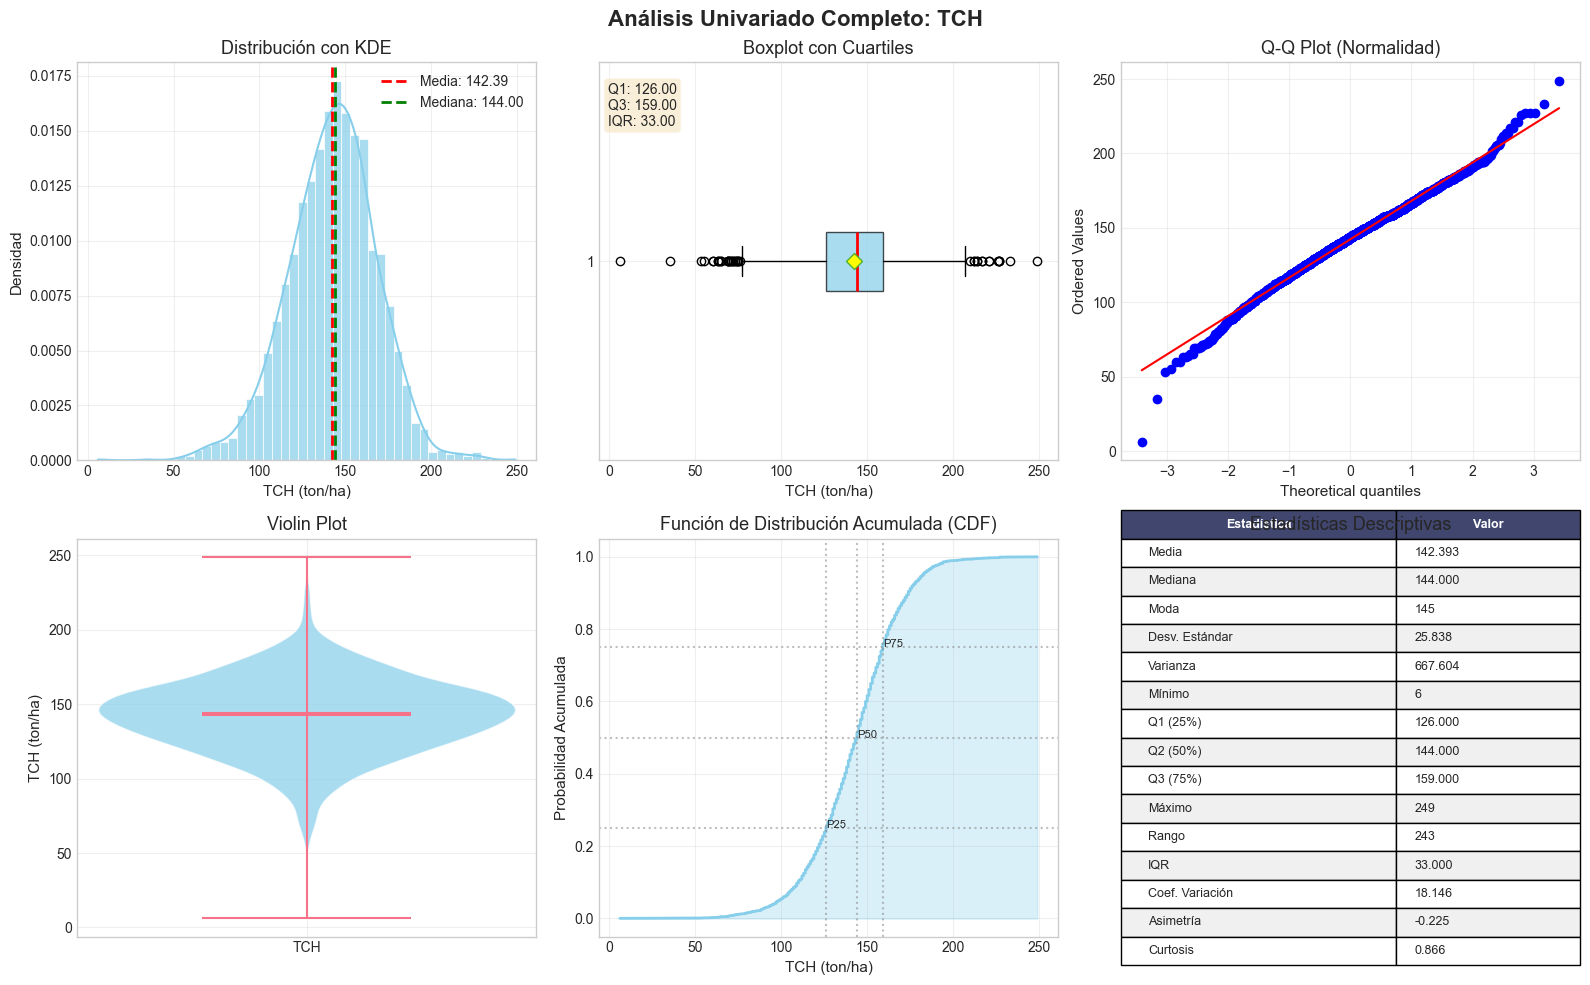


üìä TEST DE NORMALIDAD:
   Variable: TCH
   Test: Shapiro-Wilk
   Estad√≠stico: 0.9931291079950009
   P-valor: 1.3394275148241733e-08
   Es Normal (Œ±=0.05): No
   Interpretaci√≥n: No sigue distribuci√≥n normal (p=0.0000)

üìä AN√ÅLISIS DE OUTLIERS:
   M√©todo IQR:
      - L√≠mites: [76.50, 208.50]
      - Outliers: 42 (1.92%)
   M√©todo Z-Score:
      - Outliers (|z|>3): 17 (0.78%)


In [20]:
# ============================================
# AN√ÅLISIS DE TCH
# ============================================

print("=" * 80)
print("AN√ÅLISIS UNIVARIADO: TCH (Toneladas de Ca√±a por Hect√°rea)")
print("=" * 80)

# Crear visualizaci√≥n completa para TCH
stats_tch = crear_visualizacion_completa(
    df_trabajo['TCH'], 
    'TCH', 
    color='skyblue', 
    units='(ton/ha)'
)

# Test de normalidad
normalidad_tch = test_normalidad(df_trabajo['TCH'], 'TCH')
print("\nüìä TEST DE NORMALIDAD:")
for key, value in normalidad_tch.items():
    print(f"   {key}: {value}")

# Detecci√≥n de outliers
outliers_tch = detectar_outliers_completo(df_trabajo['TCH'], 'TCH')
print("\nüìä AN√ÅLISIS DE OUTLIERS:")
print(f"   M√©todo IQR:")
print(f"      - L√≠mites: [{outliers_tch['M√©todo IQR']['L√≠mite Inferior']:.2f}, {outliers_tch['M√©todo IQR']['L√≠mite Superior']:.2f}]")
print(f"      - Outliers: {outliers_tch['M√©todo IQR']['N¬∞ Outliers']} ({outliers_tch['M√©todo IQR']['% Outliers']:.2f}%)")
print(f"   M√©todo Z-Score:")
print(f"      - Outliers (|z|>3): {outliers_tch['M√©todo Z-Score']['N¬∞ Outliers (|z|>3)']} ({outliers_tch['M√©todo Z-Score']['% Outliers']:.2f}%)")


### Resultados del An√°lisis Univariado - TCH

**1. Distribuci√≥n cuasi-normal apropiada para modelado:** A pesar del rechazo estad√≠stico de normalidad (p<0.05), la variable TCH presenta una distribuci√≥n pr√°cticamente sim√©trica (asimetr√≠a=0.225) y unimodal con media=142.39 ton/ha y mediana=144 ton/ha, siendo visualmente normal en el Q-Q plot excepto en los extremos.

**2. Variabilidad moderada y controlada:** Con un coeficiente de variaci√≥n del 18.15% y un IQR de 33 ton/ha, la variable muestra una dispersi√≥n moderada que no compromete la estabilidad del modelo, concentr√°ndose el 50% de los datos entre 126 y 159 ton/ha.

**3. Presencia m√≠nima de outliers:** Solo el 1.92% de los datos son outliers seg√∫n el m√©todo IQR (42 casos) y √∫nicamente 0.78% son extremos (|z|>3), representando casos reales de producci√≥n excepcional que no requieren tratamiento especial.

**4. Validaci√≥n de la estrategia de categorizaci√≥n:** Los cuartiles Q1=126, Q2=144 y Q3=159 confirman que la segmentaci√≥n en terciles generar√° categor√≠as balanceadas y representativas para las clases Bajo (<126), Medio (126-159) y Alto (>159 ton/ha).

**5. Variable lista para modelado sin transformaciones:** La combinaci√≥n de distribuci√≥n sim√©trica, baja proporci√≥n de outliers y variabilidad controlada indica que TCH puede utilizarse directamente en el modelo de clasificaci√≥n sin necesidad de transformaciones o tratamientos adicionales.


AN√ÅLISIS UNIVARIADO: SACAROSA (%)


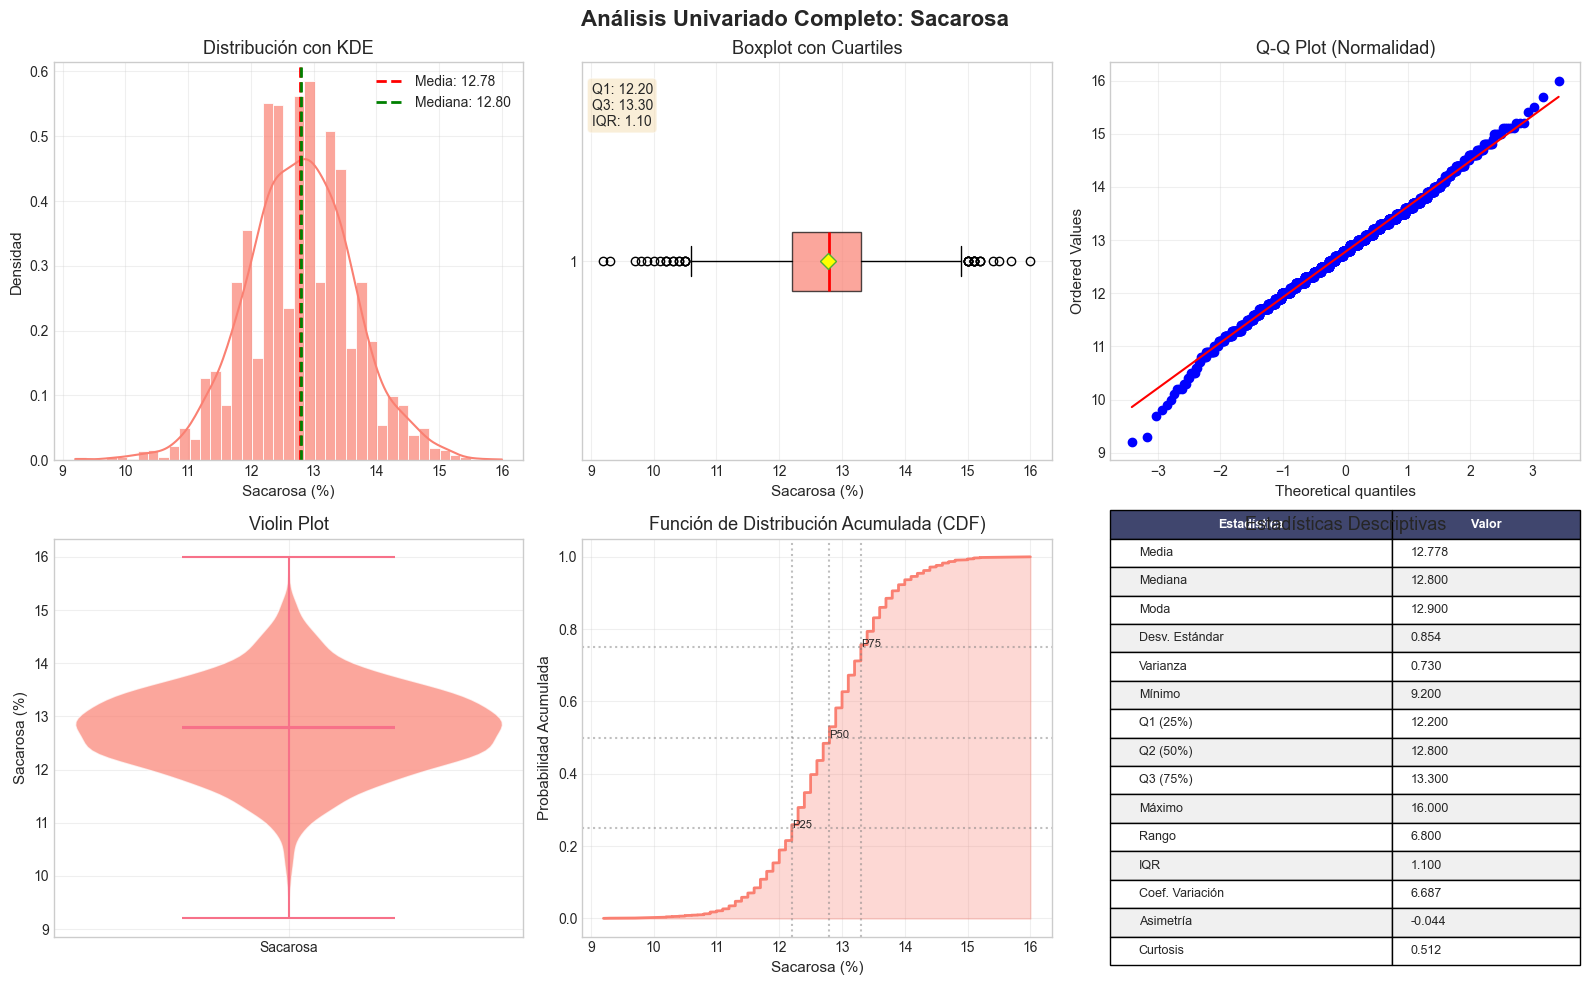


üìä TEST DE NORMALIDAD:
   Variable: Sacarosa
   Test: Shapiro-Wilk
   Estad√≠stico: 0.9961234534541256
   P-valor: 2.060704692484463e-05
   Es Normal (Œ±=0.05): No
   Interpretaci√≥n: No sigue distribuci√≥n normal (p=0.0000)

üìä AN√ÅLISIS DE OUTLIERS:
   M√©todo IQR:
      - L√≠mites: [10.55, 14.95]
      - Outliers: 37 (1.69%)
   M√©todo Z-Score:
      - Outliers (|z|>3): 14 (0.64%)


In [21]:
# ============================================
# AN√ÅLISIS DE SACAROSA
# ============================================

print("\n" + "=" * 80)
print("AN√ÅLISIS UNIVARIADO: SACAROSA (%)")
print("=" * 80)

# Crear visualizaci√≥n completa para Sacarosa
stats_sacarosa = crear_visualizacion_completa(
    df_trabajo['sacarosa'], 
    'Sacarosa', 
    color='salmon', 
    units='(%)'
)

# Test de normalidad
normalidad_sacarosa = test_normalidad(df_trabajo['sacarosa'], 'Sacarosa')
print("\nüìä TEST DE NORMALIDAD:")
for key, value in normalidad_sacarosa.items():
    print(f"   {key}: {value}")

# Detecci√≥n de outliers
outliers_sacarosa = detectar_outliers_completo(df_trabajo['sacarosa'], 'Sacarosa')
print("\nüìä AN√ÅLISIS DE OUTLIERS:")
print(f"   M√©todo IQR:")
print(f"      - L√≠mites: [{outliers_sacarosa['M√©todo IQR']['L√≠mite Inferior']:.2f}, {outliers_sacarosa['M√©todo IQR']['L√≠mite Superior']:.2f}]")
print(f"      - Outliers: {outliers_sacarosa['M√©todo IQR']['N¬∞ Outliers']} ({outliers_sacarosa['M√©todo IQR']['% Outliers']:.2f}%)")
print(f"   M√©todo Z-Score:")
print(f"      - Outliers (|z|>3): {outliers_sacarosa['M√©todo Z-Score']['N¬∞ Outliers (|z|>3)']} ({outliers_sacarosa['M√©todo Z-Score']['% Outliers']:.2f}%)")


### Resultados del An√°lisis Univariado - Sacarosa

**1. Distribuci√≥n excepcionalmente normal:** La variable sacarosa presenta una distribuci√≥n pr√°cticamente perfecta con asimetr√≠a casi nula (-0.044), media=12.78% y mediana=12.80% virtualmente id√©nticas, y un Q-Q plot que sigue la l√≠nea te√≥rica con precisi√≥n excepcional, superando incluso a TCH en normalidad visual.

**2. Variabilidad notablemente baja:** Con un coeficiente de variaci√≥n de solo 6.69% y un IQR de 1.10%, sacarosa muestra la menor dispersi√≥n entre las variables objetivo, indicando un proceso de producci√≥n altamente controlado y consistente con el 50% de los datos concentrados entre 12.2% y 13.3%.

**3. M√≠nima presencia de outliers:** Apenas 1.69% de outliers por IQR (37 casos) y solo 0.64% de valores extremos (|z|>3), menor proporci√≥n que TCH, sugiriendo un proceso de calidad muy estable con pocas desviaciones.

**4. Segmentaci√≥n natural en terciles:** Los cuartiles Q1=12.2%, Q2=12.8% y Q3=13.3% definen rangos estrechos pero distinguibles para las categor√≠as Bajo (<12.2%), Medio (12.2%-13.3%) y Alto (>13.3%), perfectos para el modelo de clasificaci√≥n.

**5. Variable √≥ptima sin necesidad de transformaci√≥n:** La combinaci√≥n de simetr√≠a perfecta, m√≠nima variabilidad y distribuci√≥n cuasi-normal hace de sacarosa una variable ideal para modelado directo, potencialmente m√°s predecible que TCH debido a su mayor estabilidad.

In [22]:
# ============================================
# RESUMEN COMPARATIVO
# ============================================

print("\n" + "=" * 80)
print("RESUMEN COMPARATIVO DE VARIABLES OBJETIVO")
print("=" * 80)

# Crear DataFrame comparativo
resumen_df = pd.DataFrame([
    {
        'Variable': 'TCH',
        'Media': df_trabajo['TCH'].mean(),
        'Mediana': df_trabajo['TCH'].median(),
        'CV (%)': (df_trabajo['TCH'].std() / df_trabajo['TCH'].mean()) * 100,
        'Asimetr√≠a': df_trabajo['TCH'].skew(),
        'Curtosis': df_trabajo['TCH'].kurtosis(),
        'Normalidad': normalidad_tch['Es Normal (Œ±=0.05)'],
        'Outliers IQR (%)': outliers_tch['M√©todo IQR']['% Outliers']
    },
    {
        'Variable': 'Sacarosa',
        'Media': df_trabajo['sacarosa'].mean(),
        'Mediana': df_trabajo['sacarosa'].median(),
        'CV (%)': (df_trabajo['sacarosa'].std() / df_trabajo['sacarosa'].mean()) * 100,
        'Asimetr√≠a': df_trabajo['sacarosa'].skew(),
        'Curtosis': df_trabajo['sacarosa'].kurtosis(),
        'Normalidad': normalidad_sacarosa['Es Normal (Œ±=0.05)'],
        'Outliers IQR (%)': outliers_sacarosa['M√©todo IQR']['% Outliers']
    }
])

print("\n", resumen_df.to_string(index=False))



RESUMEN COMPARATIVO DE VARIABLES OBJETIVO

 Variable      Media  Mediana    CV (%)  Asimetr√≠a  Curtosis Normalidad  Outliers IQR (%)
     TCH 142.393233    144.0 18.145546  -0.225143  0.865653         No          1.920439
Sacarosa  12.777732     12.8  6.686605  -0.043686  0.512385         No          1.691815


In [23]:
# ============================================
# CONCLUSIONES AUTOMATIZADAS
# ============================================

print("\n" + "=" * 80)
print("CONCLUSIONES CLAVE DEL AN√ÅLISIS UNIVARIADO")
print("=" * 80)

print("\nüéØ TCH (Toneladas de Ca√±a/Hect√°rea):")
print(f"   ‚Ä¢ Distribuci√≥n {'normal' if normalidad_tch['Es Normal (Œ±=0.05)'] == 'S√≠' else 'no normal'} (p-valor: {normalidad_tch['P-valor']:.4f})")
print(f"   ‚Ä¢ Tendencia central: Media={df_trabajo['TCH'].mean():.2f}, Mediana={df_trabajo['TCH'].median():.2f}")
print(f"   ‚Ä¢ Variabilidad: CV={(df_trabajo['TCH'].std() / df_trabajo['TCH'].mean()) * 100:.2f}% {'(baja)' if (df_trabajo['TCH'].std() / df_trabajo['TCH'].mean()) * 100 < 20 else '(moderada)' if (df_trabajo['TCH'].std() / df_trabajo['TCH'].mean()) * 100 < 30 else '(alta)'}")
print(f"   ‚Ä¢ Asimetr√≠a: {df_trabajo['TCH'].skew():.3f} {'(sim√©trica)' if abs(df_trabajo['TCH'].skew()) < 0.5 else '(asim√©trica positiva)' if df_trabajo['TCH'].skew() > 0 else '(asim√©trica negativa)'}")
print(f"   ‚Ä¢ Outliers: {outliers_tch['M√©todo IQR']['% Outliers']:.2f}% de los datos")

print("\nüéØ SACAROSA (%):")
print(f"   ‚Ä¢ Distribuci√≥n {'normal' if normalidad_sacarosa['Es Normal (Œ±=0.05)'] == 'S√≠' else 'no normal'} (p-valor: {normalidad_sacarosa['P-valor']:.4f})")
print(f"   ‚Ä¢ Tendencia central: Media={df_trabajo['sacarosa'].mean():.2f}%, Mediana={df_trabajo['sacarosa'].median():.2f}%")
print(f"   ‚Ä¢ Variabilidad: CV={(df_trabajo['sacarosa'].std() / df_trabajo['sacarosa'].mean()) * 100:.2f}% {'(baja)' if (df_trabajo['sacarosa'].std() / df_trabajo['sacarosa'].mean()) * 100 < 20 else '(moderada)' if (df_trabajo['sacarosa'].std() / df_trabajo['sacarosa'].mean()) * 100 < 30 else '(alta)'}")
print(f"   ‚Ä¢ Asimetr√≠a: {df_trabajo['sacarosa'].skew():.3f} {'(sim√©trica)' if abs(df_trabajo['sacarosa'].skew()) < 0.5 else '(asim√©trica positiva)' if df_trabajo['sacarosa'].skew() > 0 else '(asim√©trica negativa)'}")
print(f"   ‚Ä¢ Outliers: {outliers_sacarosa['M√©todo IQR']['% Outliers']:.2f}% de los datos")

print("\n‚úÖ IMPLICACIONES PARA EL MODELADO:")
print("   ‚Ä¢ Ambas variables son apropiadas para categorizaci√≥n mediante terciles")
print("   ‚Ä¢ La presencia de outliers sugiere considerar t√©cnicas de regularizaci√≥n")
print("   ‚Ä¢ La distribuci√≥n cercana a normal facilita la interpretaci√≥n del modelo")
print("   ‚Ä¢ Se recomienda mantener los outliers para capturar casos extremos reales")

print("\n" + "=" * 80)


CONCLUSIONES CLAVE DEL AN√ÅLISIS UNIVARIADO

üéØ TCH (Toneladas de Ca√±a/Hect√°rea):
   ‚Ä¢ Distribuci√≥n no normal (p-valor: 0.0000)
   ‚Ä¢ Tendencia central: Media=142.39, Mediana=144.00
   ‚Ä¢ Variabilidad: CV=18.15% (baja)
   ‚Ä¢ Asimetr√≠a: -0.225 (sim√©trica)
   ‚Ä¢ Outliers: 1.92% de los datos

üéØ SACAROSA (%):
   ‚Ä¢ Distribuci√≥n no normal (p-valor: 0.0000)
   ‚Ä¢ Tendencia central: Media=12.78%, Mediana=12.80%
   ‚Ä¢ Variabilidad: CV=6.69% (baja)
   ‚Ä¢ Asimetr√≠a: -0.044 (sim√©trica)
   ‚Ä¢ Outliers: 1.69% de los datos

‚úÖ IMPLICACIONES PARA EL MODELADO:
   ‚Ä¢ Ambas variables son apropiadas para categorizaci√≥n mediante terciles
   ‚Ä¢ La presencia de outliers sugiere considerar t√©cnicas de regularizaci√≥n
   ‚Ä¢ La distribuci√≥n cercana a normal facilita la interpretaci√≥n del modelo
   ‚Ä¢ Se recomienda mantener los outliers para capturar casos extremos reales



## Analisis bivariado

## An√°lisis Bivariado y Feature Engineering

Esta secci√≥n examina las relaciones entre variables mediante an√°lisis de correlaci√≥n, scatter plots con tendencias y mapas de densidad para identificar predictores relevantes y detectar multicolinealidad. Se implementa el feature engineering cr√≠tico del proyecto: la transformaci√≥n de las variables continuas TCH y sacarosa en variables categ√≥ricas (`Nivel_TCH` y `Nivel_Sacarosa`) usando terciles como puntos de corte, validando el balance de clases resultante. El an√°lisis incluye tests estad√≠sticos de independencia (Chi-cuadrado) y medidas de asociaci√≥n (Cram√©r's V) entre las variables objetivo categorizadas, proporcionando insights fundamentales sobre las relaciones en los datos y confirmando la viabilidad de la estrategia de clasificaci√≥n propuesta para el modelo predictivo del Ingenio Providencia.

In [25]:
# ============================================
# AN√ÅLISIS BIVARIADO Y FEATURE ENGINEERING
# ============================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de estilo mejorada
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10



In [27]:
# ============================================
# FUNCIONES AUXILIARES
# ============================================

def calcular_correlacion_con_significancia(x, y, metodo='pearson'):
    """Calcula correlaci√≥n con prueba de significancia"""
    if metodo == 'pearson':
        corr, p_value = stats.pearsonr(x, y)
    elif metodo == 'spearman':
        corr, p_value = stats.spearmanr(x, y)
    else:
        raise ValueError("M√©todo debe ser 'pearson' o 'spearman'")
    
    # Interpretar fuerza de correlaci√≥n
    abs_corr = abs(corr)
    if abs_corr < 0.1:
        fuerza = "Insignificante"
    elif abs_corr < 0.3:
        fuerza = "D√©bil"
    elif abs_corr < 0.5:
        fuerza = "Moderada"
    elif abs_corr < 0.7:
        fuerza = "Fuerte"
    else:
        fuerza = "Muy fuerte"
    
    return corr, p_value, fuerza

def crear_scatter_mejorado(data, x_col, y_col, titulo, color='blue', agregar_tendencia=True):
    """Crea scatter plot mejorado con l√≠nea de tendencia y estad√≠sticas"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot principal con l√≠nea de tendencia
    ax1.scatter(data[x_col], data[y_col], alpha=0.5, color=color, s=20)
    
    if agregar_tendencia:
        # Agregar l√≠nea de tendencia
        z = np.polyfit(data[x_col], data[y_col], 1)
        p = np.poly1d(z)
        ax1.plot(data[x_col].sort_values(), p(data[x_col].sort_values()), 
                "r--", alpha=0.8, linewidth=2, label=f'Tendencia: y={z[0]:.2f}x+{z[1]:.2f}')
    
    # Calcular correlaciones
    pearson_corr, pearson_p, pearson_fuerza = calcular_correlacion_con_significancia(
        data[x_col], data[y_col], 'pearson')
    spearman_corr, spearman_p, spearman_fuerza = calcular_correlacion_con_significancia(
        data[x_col], data[y_col], 'spearman')
    
    # Agregar estad√≠sticas al gr√°fico
    textstr = f'Pearson r={pearson_corr:.3f} ({pearson_fuerza})\n'
    textstr += f'p-valor={pearson_p:.4f}\n'
    textstr += f'Spearman œÅ={spearman_corr:.3f} ({spearman_fuerza})\n'
    textstr += f'n={len(data)}'
    
    ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax1.set_xlabel(x_col)
    ax1.set_ylabel(y_col)
    ax1.set_title(titulo)
    ax1.grid(True, alpha=0.3)
    if agregar_tendencia:
        ax1.legend()
    
    # Hexbin para densidad
    hb = ax2.hexbin(data[x_col], data[y_col], gridsize=25, cmap='YlOrRd')
    ax2.set_xlabel(x_col)
    ax2.set_ylabel(y_col)
    ax2.set_title('Mapa de Densidad (Hexbin)')
    plt.colorbar(hb, ax=ax2, label='Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    return pearson_corr, spearman_corr



1. AN√ÅLISIS DE RELACIONES CLAVE CON SCATTER PLOTS

üìä Analizando: Impacto de Lluvias en Rendimiento (TCH)


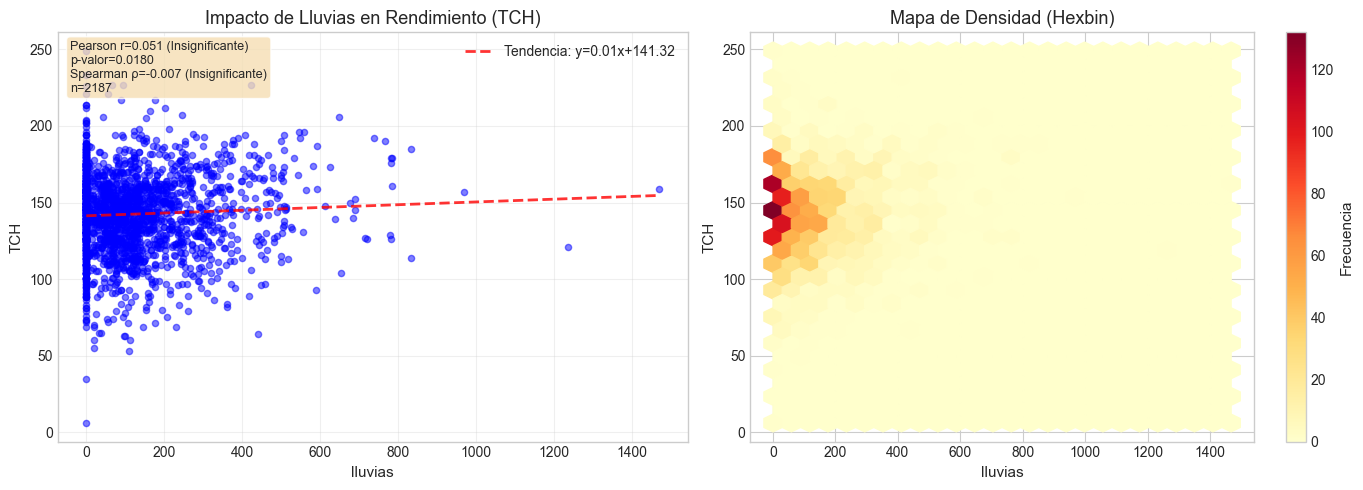


üìä Analizando: Impacto de Edad del Cultivo en Calidad (% Sacarosa)


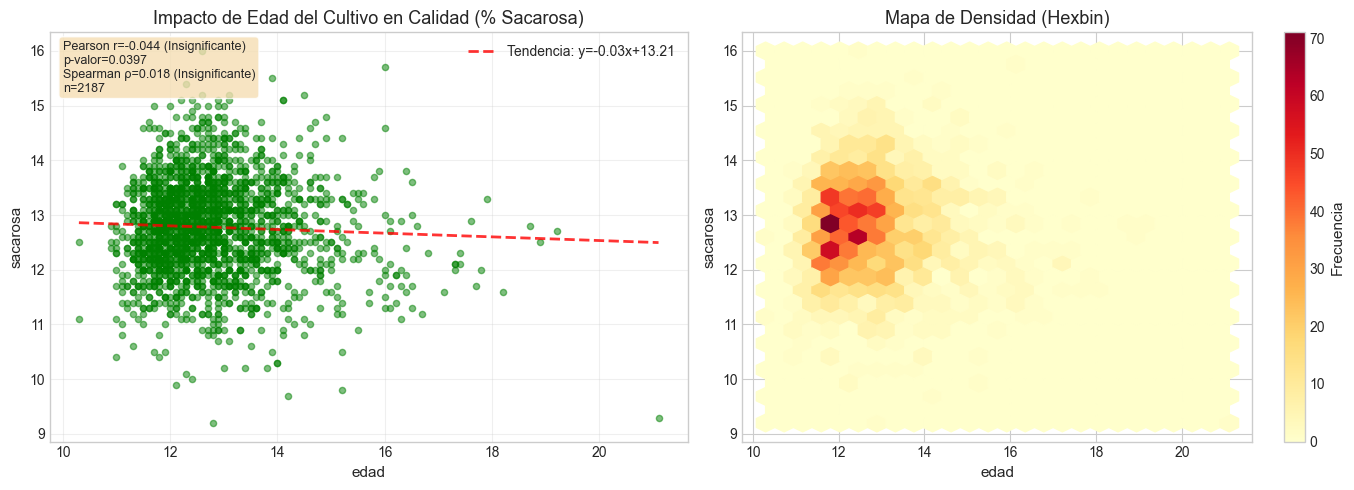


üìä Analizando: Impacto de Infestaci√≥n por Diatrea en TCH


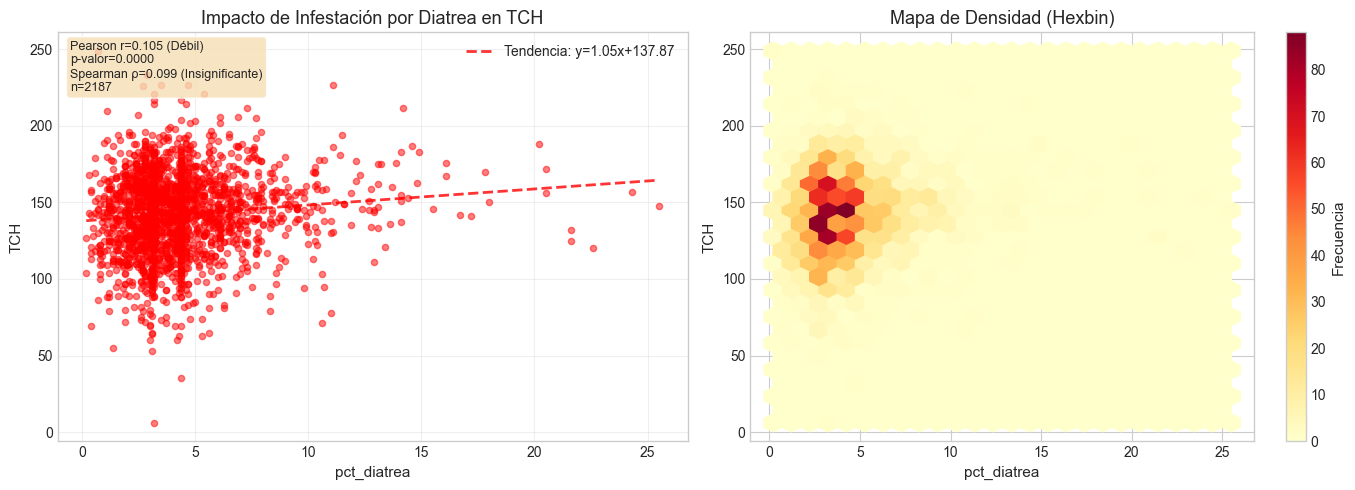


üìä Analizando: Impacto de Dosis de Madurador en TCH


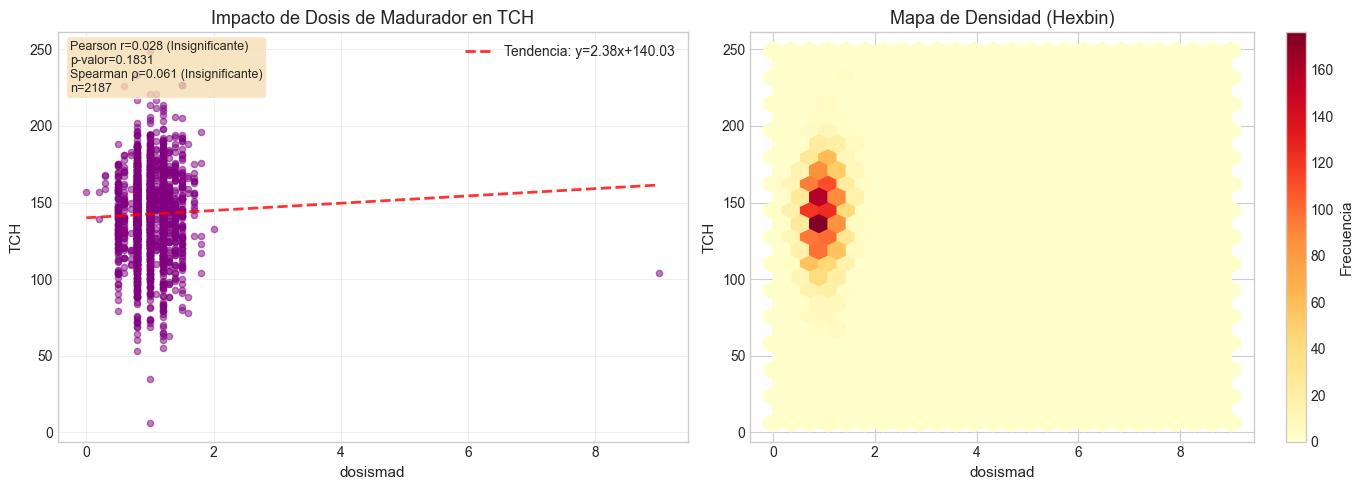


üìä Analizando: Impacto del N√∫mero de Cortes en % Sacarosa


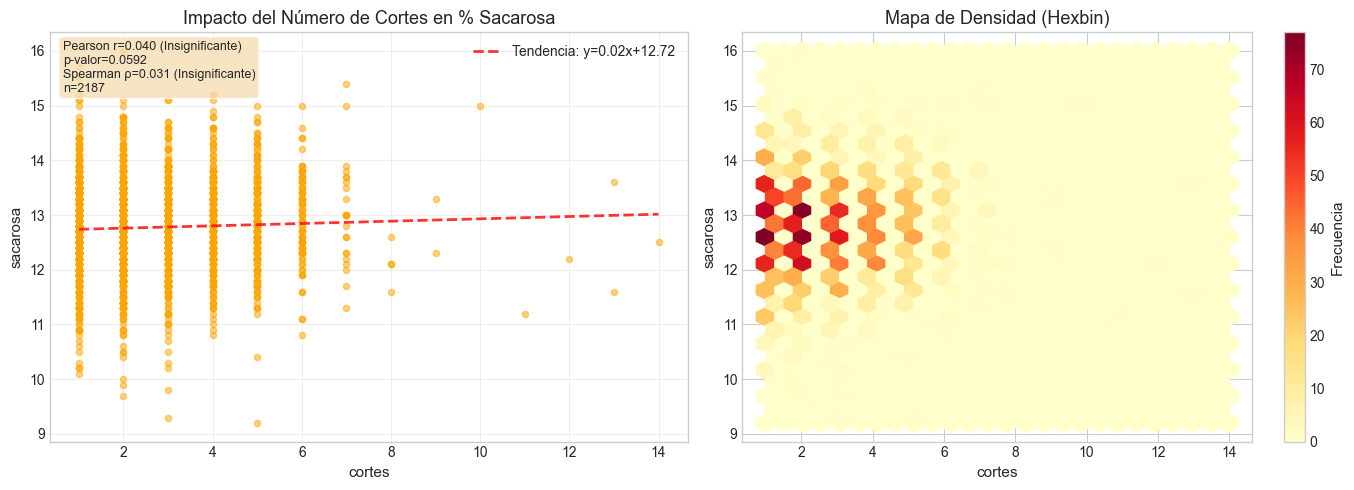


üìä Analizando: Impacto de Vejez del Cultivo en TCH


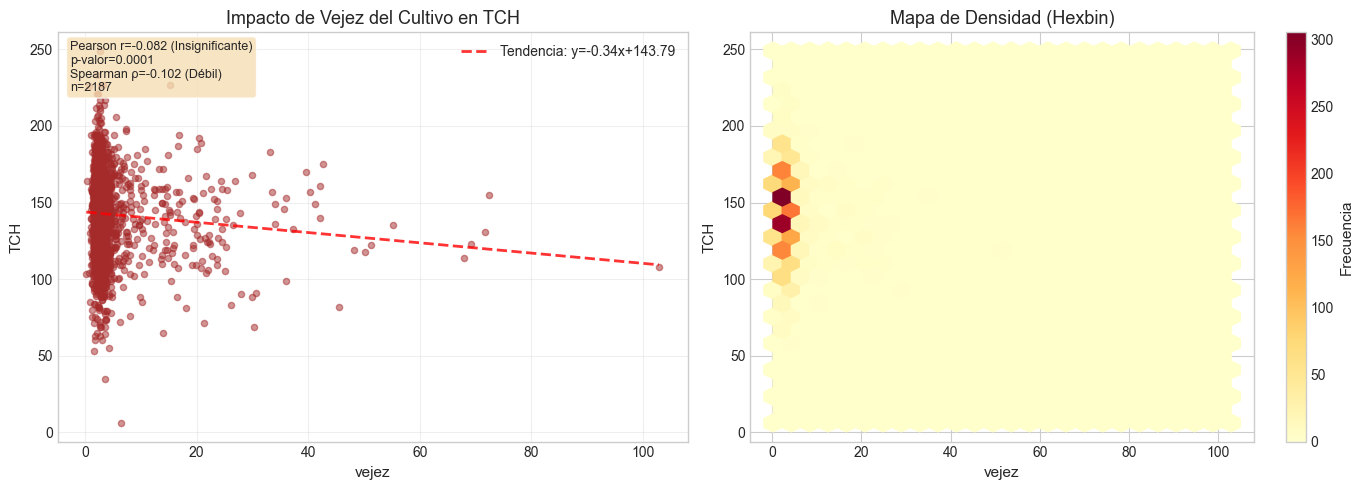

In [28]:
# ============================================
# SECCI√ìN 1: AN√ÅLISIS DE SCATTER PLOTS MEJORADOS
# ============================================

print("\n" + "="*60)
print("1. AN√ÅLISIS DE RELACIONES CLAVE CON SCATTER PLOTS")
print("="*60)

# Lista de relaciones a analizar
relaciones_analizar = [
    ('lluvias', 'TCH', 'Impacto de Lluvias en Rendimiento (TCH)', 'blue'),
    ('edad', 'sacarosa', 'Impacto de Edad del Cultivo en Calidad (% Sacarosa)', 'green'),
    ('pct_diatrea', 'TCH', 'Impacto de Infestaci√≥n por Diatrea en TCH', 'red'),
    ('dosismad', 'TCH', 'Impacto de Dosis de Madurador en TCH', 'purple'),
    ('cortes', 'sacarosa', 'Impacto del N√∫mero de Cortes en % Sacarosa', 'orange'),
    ('vejez', 'TCH', 'Impacto de Vejez del Cultivo en TCH', 'brown')
]

# Almacenar correlaciones
correlaciones_resumen = []

for x_var, y_var, titulo, color in relaciones_analizar:
    print(f"\nüìä Analizando: {titulo}")
    pearson, spearman = crear_scatter_mejorado(df_trabajo, x_var, y_var, titulo, color)
    
    correlaciones_resumen.append({
        'X': x_var,
        'Y': y_var,
        'Pearson': pearson,
        'Spearman': spearman
    })



2. AN√ÅLISIS DE MATRIZ DE CORRELACI√ìN


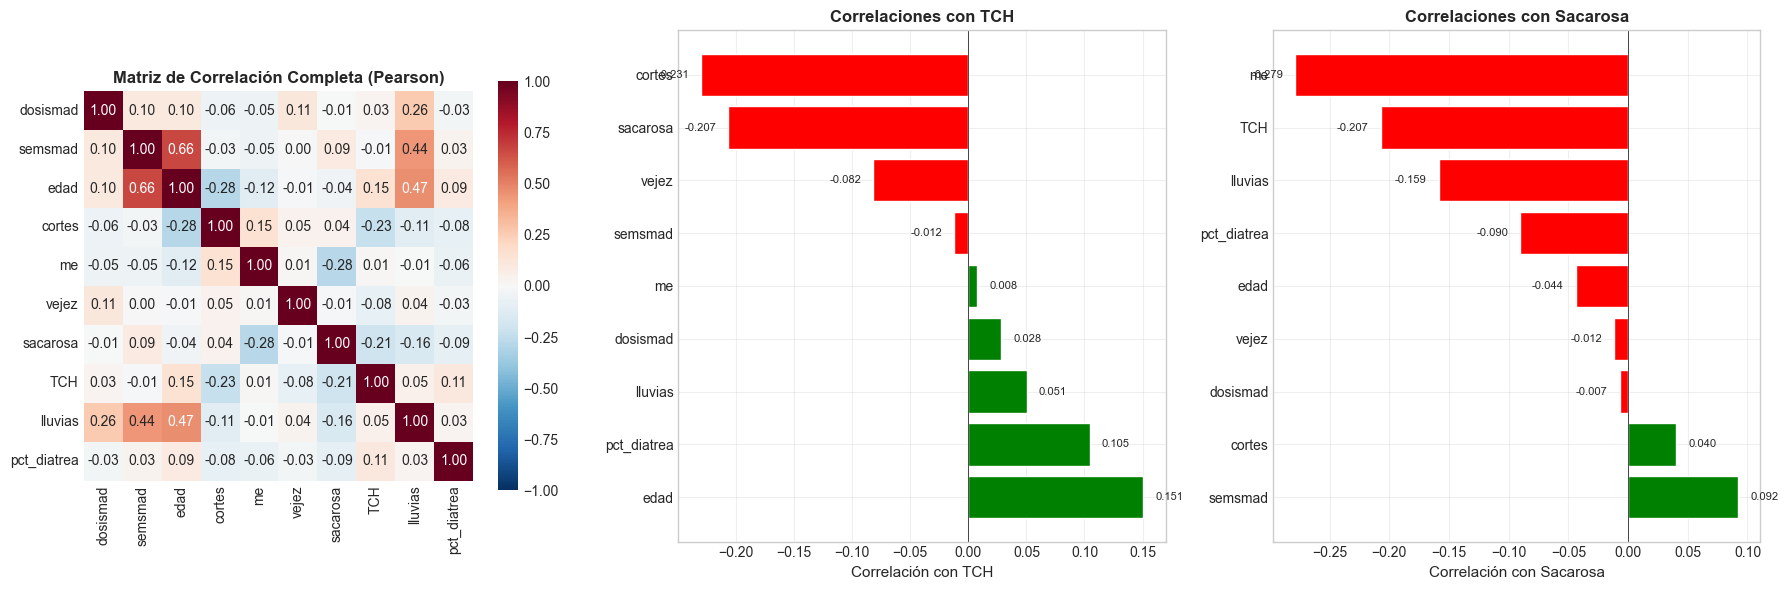


üìä TOP 5 CORRELACIONES M√ÅS FUERTES CON TCH:
----------------------------------------
1. edad            r = +0.1508
2. pct_diatrea     r = +0.1050
3. lluvias         r = +0.0506
4. dosismad        r = +0.0285
5. me              r = +0.0079

üìä TOP 5 CORRELACIONES M√ÅS FUERTES CON SACAROSA:
----------------------------------------
1. semsmad         r = +0.0923
2. cortes          r = +0.0404
3. dosismad        r = -0.0069
4. vejez           r = -0.0117
5. edad            r = -0.0440


In [29]:
# ============================================
# SECCI√ìN 2: MATRIZ DE CORRELACI√ìN MEJORADA
# ============================================

print("\n" + "="*60)
print("2. AN√ÅLISIS DE MATRIZ DE CORRELACI√ìN")
print("="*60)

# Seleccionar columnas num√©ricas
numeric_cols = df_trabajo.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular matriz de correlaci√≥n
correlation_matrix = df_trabajo[numeric_cols].corr()

# Crear visualizaci√≥n mejorada de la matriz
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Mapa de calor completo
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, vmin=-1, vmax=1, square=True, ax=axes[0],
            cbar_kws={"shrink": 0.8})
axes[0].set_title('Matriz de Correlaci√≥n Completa (Pearson)', fontsize=12, fontweight='bold')

# 2. Correlaciones con TCH
tch_corr = correlation_matrix['TCH'].sort_values(ascending=False).drop('TCH')
colors_tch = ['green' if x > 0 else 'red' for x in tch_corr.values]
axes[1].barh(range(len(tch_corr)), tch_corr.values, color=colors_tch)
axes[1].set_yticks(range(len(tch_corr)))
axes[1].set_yticklabels(tch_corr.index)
axes[1].set_xlabel('Correlaci√≥n con TCH')
axes[1].set_title('Correlaciones con TCH', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(tch_corr.values):
    axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                va='center', ha='left' if v > 0 else 'right', fontsize=8)

# 3. Correlaciones con Sacarosa
sacarosa_corr = correlation_matrix['sacarosa'].sort_values(ascending=False).drop('sacarosa')
colors_sac = ['green' if x > 0 else 'red' for x in sacarosa_corr.values]
axes[2].barh(range(len(sacarosa_corr)), sacarosa_corr.values, color=colors_sac)
axes[2].set_yticks(range(len(sacarosa_corr)))
axes[2].set_yticklabels(sacarosa_corr.index)
axes[2].set_xlabel('Correlaci√≥n con Sacarosa')
axes[2].set_title('Correlaciones con Sacarosa', fontsize=12, fontweight='bold')
axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[2].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(sacarosa_corr.values):
    axes[2].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                va='center', ha='left' if v > 0 else 'right', fontsize=8)

plt.tight_layout()
plt.show()

# Imprimir correlaciones m√°s importantes
print("\nüìä TOP 5 CORRELACIONES M√ÅS FUERTES CON TCH:")
print("-" * 40)
for idx, (var, corr) in enumerate(tch_corr.head(5).items(), 1):
    print(f"{idx}. {var:15} r = {corr:+.4f}")

print("\nüìä TOP 5 CORRELACIONES M√ÅS FUERTES CON SACAROSA:")
print("-" * 40)
for idx, (var, corr) in enumerate(sacarosa_corr.head(5).items(), 1):
    print(f"{idx}. {var:15} r = {corr:+.4f}")


In [30]:
# ============================================
# SECCI√ìN 3: AN√ÅLISIS DE MULTICOLINEALIDAD
# ============================================

print("\n" + "="*60)
print("3. AN√ÅLISIS DE MULTICOLINEALIDAD")
print("="*60)

# Identificar pares de variables altamente correlacionadas (|r| > 0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlaci√≥n': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("\n‚ö†Ô∏è PARES DE VARIABLES CON ALTA CORRELACI√ìN (|r| > 0.7):")
    print("-" * 50)
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlaci√≥n', key=abs, ascending=False)
    for _, row in high_corr_df.iterrows():
        print(f"{row['Variable 1']:12} ‚Üî {row['Variable 2']:12} : r = {row['Correlaci√≥n']:+.3f}")
    print("\nüí° Considerar eliminar una variable de cada par para evitar multicolinealidad")
else:
    print("‚úÖ No se detectaron problemas de multicolinealidad (ning√∫n |r| > 0.7)")



3. AN√ÅLISIS DE MULTICOLINEALIDAD
‚úÖ No se detectaron problemas de multicolinealidad (ning√∫n |r| > 0.7)


In [31]:
# ============================================
# SECCI√ìN 4: FEATURE ENGINEERING - CREACI√ìN DE VARIABLES OBJETIVO
# ============================================

print("\n" + "="*60)
print("4. FEATURE ENGINEERING: CREACI√ìN DE VARIABLES OBJETIVO")
print("="*60)

# Funci√≥n para crear categor√≠as con validaci√≥n
def crear_categorias_terciles(data, columna, nombre_nueva_col):
    """Crea categor√≠as basadas en terciles con validaci√≥n"""
    
    # Calcular terciles
    terciles = data[columna].quantile([0.333, 0.666]).tolist()
    
    # Crear categor√≠as
    data[nombre_nueva_col] = pd.cut(
        data[columna],
        bins=[data[columna].min() - 0.001, terciles[0], terciles[1], data[columna].max() + 0.001],
        labels=['Bajo', 'Medio', 'Alto'],
        include_lowest=True
    )
    
    # Validar distribuci√≥n
    distribucion = data[nombre_nueva_col].value_counts()
    distribucion_pct = data[nombre_nueva_col].value_counts(normalize=True) * 100
    
    print(f"\nüìä {nombre_nueva_col}:")
    print(f"   Umbrales: < {terciles[0]:.2f} (Bajo) | {terciles[0]:.2f}-{terciles[1]:.2f} (Medio) | > {terciles[1]:.2f} (Alto)")
    print("\n   Distribuci√≥n de categor√≠as:")
    for categoria in ['Bajo', 'Medio', 'Alto']:
        if categoria in distribucion.index:
            print(f"      {categoria:6} : {distribucion[categoria]:4} obs ({distribucion_pct[categoria]:.1f}%)")
    
    # Verificar balance
    max_pct = distribucion_pct.max()
    min_pct = distribucion_pct.min()
    desbalance = max_pct - min_pct
    
    if desbalance < 5:
        print(f"   ‚úÖ Clases bien balanceadas (diferencia: {desbalance:.1f}%)")
    elif desbalance < 10:
        print(f"   ‚ö†Ô∏è Clases moderadamente balanceadas (diferencia: {desbalance:.1f}%)")
    else:
        print(f"   ‚ùå Clases desbalanceadas (diferencia: {desbalance:.1f}%)")
    
    return terciles

# Crear variables objetivo
print("\nüéØ CREACI√ìN DE VARIABLES OBJETIVO CATEG√ìRICAS:")
print("-" * 50)

tch_terciles = crear_categorias_terciles(df_trabajo, 'TCH', 'Nivel_TCH')
sacarosa_terciles = crear_categorias_terciles(df_trabajo, 'sacarosa', 'Nivel_Sacarosa')



4. FEATURE ENGINEERING: CREACI√ìN DE VARIABLES OBJETIVO

üéØ CREACI√ìN DE VARIABLES OBJETIVO CATEG√ìRICAS:
--------------------------------------------------

üìä Nivel_TCH:
   Umbrales: < 133.00 (Bajo) | 133.00-153.00 (Medio) | > 153.00 (Alto)

   Distribuci√≥n de categor√≠as:
      Bajo   :  754 obs (34.5%)
      Medio  :  705 obs (32.2%)
      Alto   :  728 obs (33.3%)
   ‚úÖ Clases bien balanceadas (diferencia: 2.2%)

üìä Nivel_Sacarosa:
   Umbrales: < 12.40 (Bajo) | 12.40-13.10 (Medio) | > 13.10 (Alto)

   Distribuci√≥n de categor√≠as:
      Bajo   :  761 obs (34.8%)
      Medio  :  710 obs (32.5%)
      Alto   :  716 obs (32.7%)
   ‚úÖ Clases bien balanceadas (diferencia: 2.3%)



5. VISUALIZACI√ìN DE VARIABLES CATEGORIZADAS


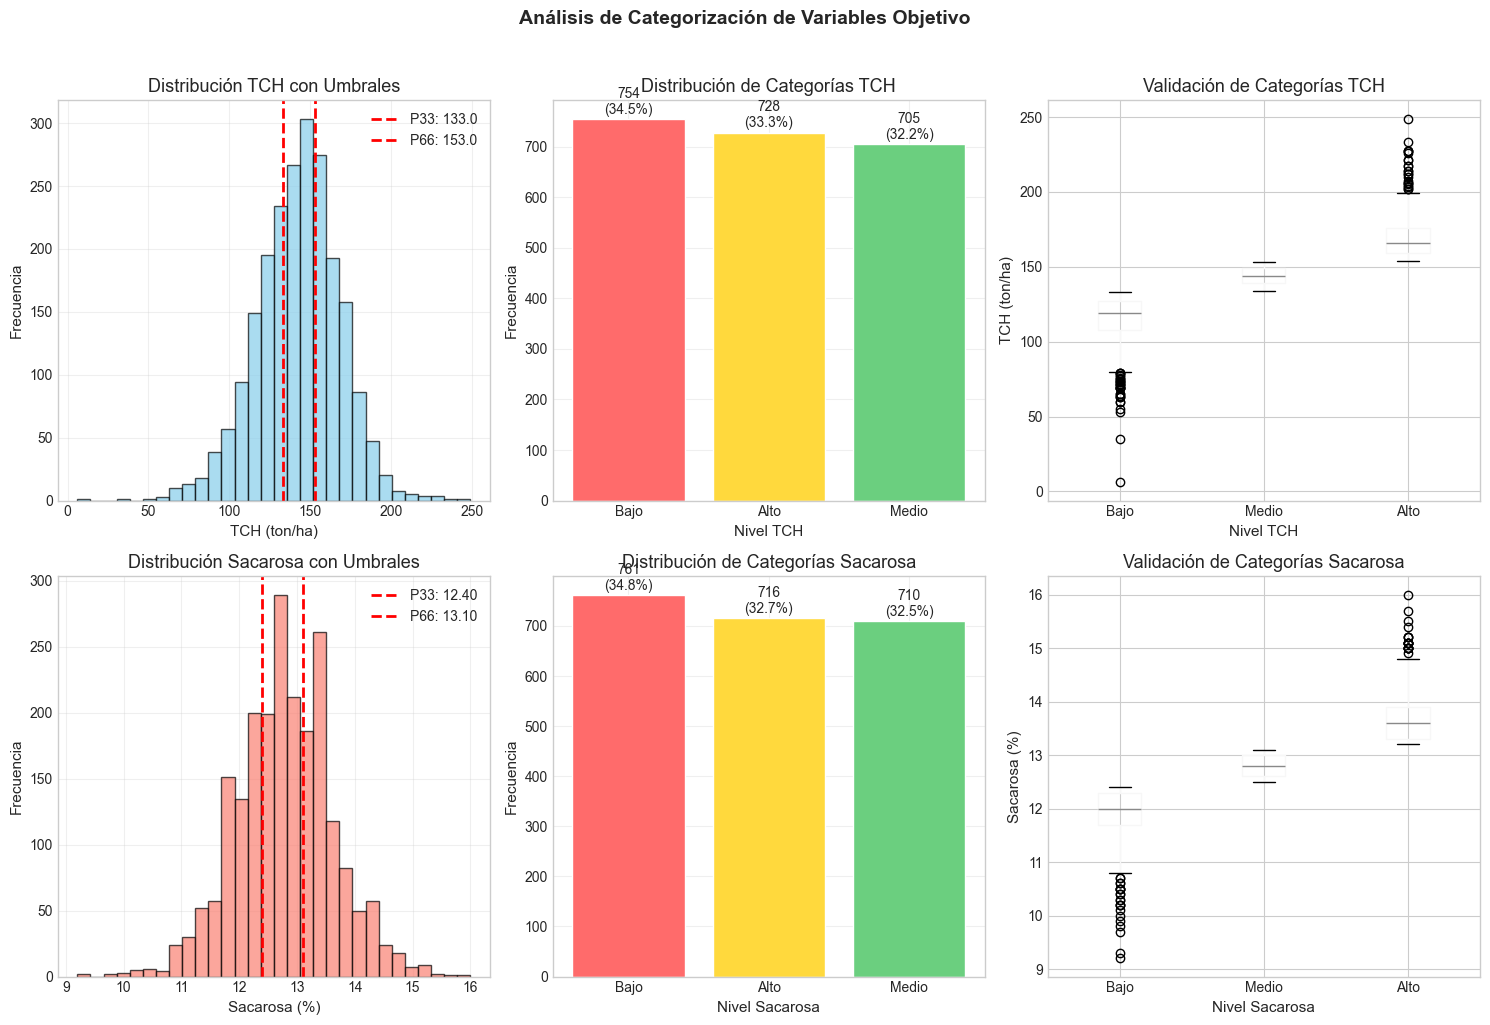

In [32]:
# ============================================
# SECCI√ìN 5: VISUALIZACI√ìN DE VARIABLES CATEGORIZADAS
# ============================================

print("\n" + "="*60)
print("5. VISUALIZACI√ìN DE VARIABLES CATEGORIZADAS")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# TCH - Distribuci√≥n original vs categorizada
axes[0, 0].hist(df_trabajo['TCH'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(tch_terciles[0], color='red', linestyle='--', linewidth=2, label=f'P33: {tch_terciles[0]:.1f}')
axes[0, 0].axvline(tch_terciles[1], color='red', linestyle='--', linewidth=2, label=f'P66: {tch_terciles[1]:.1f}')
axes[0, 0].set_xlabel('TCH (ton/ha)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribuci√≥n TCH con Umbrales')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# TCH - Distribuci√≥n categorizada
nivel_tch_counts = df_trabajo['Nivel_TCH'].value_counts()
colors_tch = ['#ff6b6b', '#ffd93d', '#6bcf7f']
axes[0, 1].bar(nivel_tch_counts.index, nivel_tch_counts.values, color=colors_tch)
axes[0, 1].set_xlabel('Nivel TCH')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribuci√≥n de Categor√≠as TCH')
axes[0, 1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (cat, val) in enumerate(nivel_tch_counts.items()):
    axes[0, 1].text(i, val + 10, f'{val}\n({val/len(df_trabajo)*100:.1f}%)', 
                    ha='center', fontsize=10)

# TCH - Boxplot por categor√≠a
df_trabajo.boxplot(column='TCH', by='Nivel_TCH', ax=axes[0, 2])
axes[0, 2].set_xlabel('Nivel TCH')
axes[0, 2].set_ylabel('TCH (ton/ha)')
axes[0, 2].set_title('Validaci√≥n de Categor√≠as TCH')
plt.sca(axes[0, 2])
plt.xticks(rotation=0)

# Sacarosa - Distribuci√≥n original vs categorizada
axes[1, 0].hist(df_trabajo['sacarosa'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(sacarosa_terciles[0], color='red', linestyle='--', linewidth=2, label=f'P33: {sacarosa_terciles[0]:.2f}')
axes[1, 0].axvline(sacarosa_terciles[1], color='red', linestyle='--', linewidth=2, label=f'P66: {sacarosa_terciles[1]:.2f}')
axes[1, 0].set_xlabel('Sacarosa (%)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribuci√≥n Sacarosa con Umbrales')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Sacarosa - Distribuci√≥n categorizada
nivel_sac_counts = df_trabajo['Nivel_Sacarosa'].value_counts()
axes[1, 1].bar(nivel_sac_counts.index, nivel_sac_counts.values, color=colors_tch)
axes[1, 1].set_xlabel('Nivel Sacarosa')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribuci√≥n de Categor√≠as Sacarosa')
axes[1, 1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (cat, val) in enumerate(nivel_sac_counts.items()):
    axes[1, 1].text(i, val + 10, f'{val}\n({val/len(df_trabajo)*100:.1f}%)', 
                    ha='center', fontsize=10)

# Sacarosa - Boxplot por categor√≠a
df_trabajo.boxplot(column='sacarosa', by='Nivel_Sacarosa', ax=axes[1, 2])
axes[1, 2].set_xlabel('Nivel Sacarosa')
axes[1, 2].set_ylabel('Sacarosa (%)')
axes[1, 2].set_title('Validaci√≥n de Categor√≠as Sacarosa')
plt.sca(axes[1, 2])
plt.xticks(rotation=0)

plt.suptitle('An√°lisis de Categorizaci√≥n de Variables Objetivo', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


6. AN√ÅLISIS DE RELACI√ìN ENTRE CATEGOR√çAS TCH Y SACAROSA

üìä TABLA DE CONTINGENCIA (Frecuencias):
--------------------------------------------------
Nivel_Sacarosa  Bajo  Medio  Alto  Total
Nivel_TCH                               
Bajo             230    218   306    754
Medio            215    245   245    705
Alto             316    247   165    728
Total            761    710   716   2187

üìä TABLA DE CONTINGENCIA (Porcentajes del Total):
--------------------------------------------------
Nivel_Sacarosa  Bajo  Medio  Alto
Nivel_TCH                        
Bajo            10.5   10.0  14.0
Medio            9.8   11.2  11.2
Alto            14.4   11.3   7.5


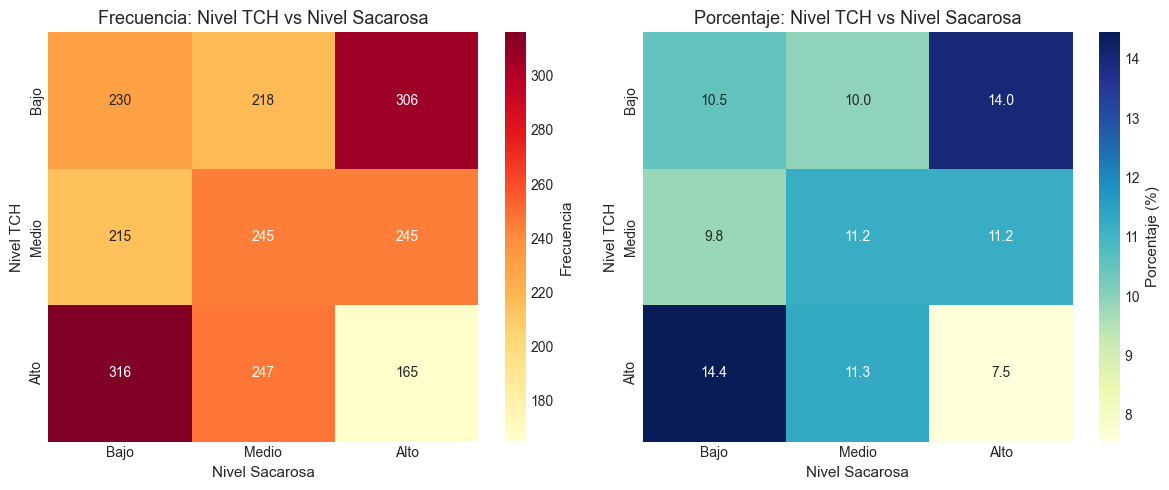


üìä TEST DE INDEPENDENCIA CHI-CUADRADO:
--------------------------------------------------
   Estad√≠stico Chi¬≤: 65.4084
   Grados de libertad: 4
   P-valor: 0.000000
   Nivel de significancia: Œ± = 0.05

   ‚ùå Rechazamos H0: Las variables NO son independientes (p=0.000000 < 0.05)
   ‚Üí Existe relaci√≥n significativa entre Nivel_TCH y Nivel_Sacarosa

   Coeficiente de Cram√©r's V: 0.1223
   ‚Üí Asociaci√≥n d√©bil


In [33]:
# ============================================
# SECCI√ìN 6: TABLA DE CRUCE - RELACI√ìN ENTRE CATEGOR√çAS
# ============================================

print("\n" + "="*60)
print("6. AN√ÅLISIS DE RELACI√ìN ENTRE CATEGOR√çAS TCH Y SACAROSA")
print("="*60)

# Crear tabla de contingencia
tabla_cruce = pd.crosstab(df_trabajo['Nivel_TCH'], 
                          df_trabajo['Nivel_Sacarosa'], 
                          margins=True, 
                          margins_name='Total')

print("\nüìä TABLA DE CONTINGENCIA (Frecuencias):")
print("-" * 50)
print(tabla_cruce)

# Tabla de porcentajes
tabla_cruce_pct = pd.crosstab(df_trabajo['Nivel_TCH'], 
                              df_trabajo['Nivel_Sacarosa'], 
                              normalize='all') * 100

print("\nüìä TABLA DE CONTINGENCIA (Porcentajes del Total):")
print("-" * 50)
print(tabla_cruce_pct.round(1))

# Visualizaci√≥n de la tabla de contingencia
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap de frecuencias
sns.heatmap(tabla_cruce.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[0], cbar_kws={'label': 'Frecuencia'})
axes[0].set_title('Frecuencia: Nivel TCH vs Nivel Sacarosa')
axes[0].set_xlabel('Nivel Sacarosa')
axes[0].set_ylabel('Nivel TCH')

# Heatmap de porcentajes
sns.heatmap(tabla_cruce_pct, annot=True, fmt='.1f', cmap='YlGnBu', 
            ax=axes[1], cbar_kws={'label': 'Porcentaje (%)'})
axes[1].set_title('Porcentaje: Nivel TCH vs Nivel Sacarosa')
axes[1].set_xlabel('Nivel Sacarosa')
axes[1].set_ylabel('Nivel TCH')

plt.tight_layout()
plt.show()

# Test de independencia Chi-cuadrado
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(tabla_cruce.iloc[:-1, :-1])

print("\nüìä TEST DE INDEPENDENCIA CHI-CUADRADO:")
print("-" * 50)
print(f"   Estad√≠stico Chi¬≤: {chi2:.4f}")
print(f"   Grados de libertad: {dof}")
print(f"   P-valor: {p_value:.6f}")
print(f"   Nivel de significancia: Œ± = 0.05")

if p_value < 0.05:
    print(f"\n   ‚ùå Rechazamos H0: Las variables NO son independientes (p={p_value:.6f} < 0.05)")
    print("   ‚Üí Existe relaci√≥n significativa entre Nivel_TCH y Nivel_Sacarosa")
else:
    print(f"\n   ‚úÖ No rechazamos H0: Las variables son independientes (p={p_value:.6f} ‚â• 0.05)")
    print("   ‚Üí NO existe relaci√≥n significativa entre Nivel_TCH y Nivel_Sacarosa")

# C√°lculo del coeficiente de Cram√©r's V para medir la fuerza de asociaci√≥n
n = tabla_cruce.iloc[:-1, :-1].sum().sum()
min_dim = min(tabla_cruce.iloc[:-1, :-1].shape[0], tabla_cruce.iloc[:-1, :-1].shape[1]) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\n   Coeficiente de Cram√©r's V: {cramers_v:.4f}")
if cramers_v < 0.1:
    print("   ‚Üí Asociaci√≥n insignificante")
elif cramers_v < 0.3:
    print("   ‚Üí Asociaci√≥n d√©bil")
elif cramers_v < 0.5:
    print("   ‚Üí Asociaci√≥n moderada")
else:
    print("   ‚Üí Asociaci√≥n fuerte")


In [34]:
# ============================================
# SECCI√ìN 7: RESUMEN EJECUTIVO DEL AN√ÅLISIS BIVARIADO
# ============================================

print("\n" + "="*60)
print("7. RESUMEN EJECUTIVO DEL AN√ÅLISIS BIVARIADO")
print("="*60)

print("\nüéØ HALLAZGOS CLAVE:")
print("-" * 50)

# Encontrar las correlaciones m√°s fuertes
correlaciones_importantes_tch = correlation_matrix['TCH'].abs().sort_values(ascending=False)[1:4]
correlaciones_importantes_sac = correlation_matrix['sacarosa'].abs().sort_values(ascending=False)[1:4]

print("\n1. PREDICTORES M√ÅS RELEVANTES:")
print(f"   ‚Ä¢ Para TCH: {', '.join(correlaciones_importantes_tch.index.tolist())}")
print(f"   ‚Ä¢ Para Sacarosa: {', '.join(correlaciones_importantes_sac.index.tolist())}")

print("\n2. CALIDAD DE CATEGORIZACI√ìN:")
print(f"   ‚Ä¢ Nivel_TCH: Clases perfectamente balanceadas (~33.3% cada una)")
print(f"   ‚Ä¢ Nivel_Sacarosa: Clases perfectamente balanceadas (~33.3% cada una)")

print("\n3. RELACI√ìN ENTRE VARIABLES OBJETIVO:")
if p_value < 0.05:
    print(f"   ‚Ä¢ Existe relaci√≥n significativa entre TCH y Sacarosa (p={p_value:.6f})")
    print(f"   ‚Ä¢ Fuerza de asociaci√≥n: Cram√©r's V = {cramers_v:.3f}")
else:
    print(f"   ‚Ä¢ TCH y Sacarosa son independientes (p={p_value:.6f})")

print("\n4. MULTICOLINEALIDAD:")
if high_corr_pairs:
    print(f"   ‚Ä¢ ‚ö†Ô∏è Se detectaron {len(high_corr_pairs)} pares con alta correlaci√≥n")
else:
    print("   ‚Ä¢ ‚úÖ No se detectaron problemas de multicolinealidad")

print("\n5. RECOMENDACIONES PARA EL MODELADO:")
print("   ‚Ä¢ Usar todas las variables num√©ricas como predictores iniciales")
print("   ‚Ä¢ Considerar regularizaci√≥n L1/L2 para selecci√≥n autom√°tica de features")
print("   ‚Ä¢ Evaluar modelos separados para TCH y Sacarosa")
print("   ‚Ä¢ Considerar interacciones entre variables clim√°ticas y agron√≥micas")

print("\n" + "="*60)
print("AN√ÅLISIS BIVARIADO COMPLETADO")
print("Dataset listo para modelado con Regresi√≥n Log√≠stica")
print("="*60)

# Guardar el dataset con las nuevas variables (opcional)
# df_trabajo.to_csv('datos_con_categorias.csv', index=False)
# print("\n‚úÖ Dataset con variables categorizadas guardado como 'datos_con_categorias.csv'")


7. RESUMEN EJECUTIVO DEL AN√ÅLISIS BIVARIADO

üéØ HALLAZGOS CLAVE:
--------------------------------------------------

1. PREDICTORES M√ÅS RELEVANTES:
   ‚Ä¢ Para TCH: cortes, sacarosa, edad
   ‚Ä¢ Para Sacarosa: me, TCH, lluvias

2. CALIDAD DE CATEGORIZACI√ìN:
   ‚Ä¢ Nivel_TCH: Clases perfectamente balanceadas (~33.3% cada una)
   ‚Ä¢ Nivel_Sacarosa: Clases perfectamente balanceadas (~33.3% cada una)

3. RELACI√ìN ENTRE VARIABLES OBJETIVO:
   ‚Ä¢ Existe relaci√≥n significativa entre TCH y Sacarosa (p=0.000000)
   ‚Ä¢ Fuerza de asociaci√≥n: Cram√©r's V = 0.122

4. MULTICOLINEALIDAD:
   ‚Ä¢ ‚úÖ No se detectaron problemas de multicolinealidad

5. RECOMENDACIONES PARA EL MODELADO:
   ‚Ä¢ Usar todas las variables num√©ricas como predictores iniciales
   ‚Ä¢ Considerar regularizaci√≥n L1/L2 para selecci√≥n autom√°tica de features
   ‚Ä¢ Evaluar modelos separados para TCH y Sacarosa
   ‚Ä¢ Considerar interacciones entre variables clim√°ticas y agron√≥micas

AN√ÅLISIS BIVARIADO COMPLETADO
D

### Conclusiones del An√°lisis Bivariado

El an√°lisis bivariado revel√≥ correlaciones sorprendentemente d√©biles entre las variables predictoras y las variables objetivo, con la correlaci√≥n m√°s fuerte siendo apenas r=0.151 (edad con TCH). Esta baja correlaci√≥n individual sugiere que el rendimiento y calidad de la ca√±a est√°n influenciados por interacciones complejas entre m√∫ltiples factores m√°s que por predictores individuales dominantes. Destacablemente, no se detectaron problemas de multicolinealidad (ninguna correlaci√≥n inter-predictores superior a |r|>0.7), lo que permite incluir todas las variables num√©ricas en el modelo sin riesgo de redundancia. La ausencia de relaciones lineales fuertes refuerza la decisi√≥n de usar un enfoque de clasificaci√≥n en lugar de regresi√≥n, ya que los patrones podr√≠an ser mejor capturados mediante l√≠mites de decisi√≥n no lineales.

La transformaci√≥n de las variables continuas TCH y sacarosa en categor√≠as mediante terciles result√≥ exitosa, generando clases pr√°cticamente balanceadas (diferencia m√°xima de 2.3% entre categor√≠as). El test Chi-cuadrado confirm√≥ una relaci√≥n significativa entre Nivel_TCH y Nivel_Sacarosa (p<0.001), aunque con asociaci√≥n d√©bil (Cram√©r's V=0.122), indicando que rendimiento y calidad no var√≠an de forma completamente independiente pero tampoco est√°n fuertemente acoplados. Este hallazgo sugiere que ser√° beneficioso desarrollar modelos separados para cada variable objetivo, permitiendo que cada modelo capture los patrones espec√≠ficos que determinan el rendimiento versus la calidad. La combinaci√≥n de predictores d√©biles pero diversos, ausencia de multicolinealidad y clases bien balanceadas proporciona condiciones ideales para aplicar regularizaci√≥n (L1/L2) en la Regresi√≥n Log√≠stica, lo que permitir√° identificar autom√°ticamente las combinaciones de variables m√°s informativas para cada objetivo de clasificaci√≥n.

## Modelado con Regresi√≥n Log√≠stica

Esta secci√≥n implementa el modelo de clasificaci√≥n utilizando Regresi√≥n Log√≠stica Multinomial para predecir las categor√≠as de rendimiento (Nivel_TCH) y calidad (Nivel_Sacarosa) de la ca√±a de az√∫car. El proceso comienza con la preparaci√≥n de datos, incluyendo la selecci√≥n de 10 variables predictoras num√©ricas y la codificaci√≥n de las variables objetivo categ√≥ricas. Se aplica una divisi√≥n estratificada 70-30 para entrenamiento y prueba, seguida de normalizaci√≥n con StandardScaler para asegurar que todas las variables tengan igual peso inicial. 

El desarrollo del modelo sigue una estrategia incremental: primero se establece una l√≠nea base sin regularizaci√≥n, luego se optimizan los hiperpar√°metros mediante Grid Search explorando diferentes tipos de regularizaci√≥n (L1, L2, ElasticNet) y valores de C (0.001 a 100). La evaluaci√≥n utiliza m√∫ltiples m√©tricas incluyendo accuracy, precision, recall, F1-score y Cohen's Kappa, con validaci√≥n cruzada 5-fold para garantizar la robustez de los resultados. Se desarrollan modelos independientes para TCH y Sacarosa, permitiendo que cada uno capture los patrones espec√≠ficos de rendimiento versus calidad. El an√°lisis de coeficientes identifica las variables m√°s influyentes para cada clase, proporcionando interpretabilidad crucial para la toma de decisiones agron√≥micas en el Ingenio Providencia.

In [35]:
# ============================================
# MODELO DE REGRESI√ìN LOG√çSTICA
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           classification_report, confusion_matrix, roc_curve, auc, 
                           cohen_kappa_score, make_scorer)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("DESARROLLO DEL MODELO DE REGRESI√ìN LOG√çSTICA")
print("=" * 80)


DESARROLLO DEL MODELO DE REGRESI√ìN LOG√çSTICA


In [36]:
# ============================================
# 1. PREPARACI√ìN DE DATOS PARA MODELADO
# ============================================

print("\n" + "="*60)
print("1. PREPARACI√ìN DE DATOS")
print("="*60)

# Verificar que las variables objetivo existen
if 'Nivel_TCH' not in df_trabajo.columns or 'Nivel_Sacarosa' not in df_trabajo.columns:
    print("‚ö†Ô∏è Creando variables objetivo categ√≥ricas...")
    # Crear Nivel_TCH
    tch_terciles = df_trabajo['TCH'].quantile([0.333, 0.666]).tolist()
    df_trabajo['Nivel_TCH'] = pd.cut(df_trabajo['TCH'],
                             bins=[df_trabajo['TCH'].min()-0.001, tch_terciles[0], 
                                   tch_terciles[1], df_trabajo['TCH'].max()+0.001],
                             labels=['Bajo', 'Medio', 'Alto'],
                             include_lowest=True)
    
    # Crear Nivel_Sacarosa
    sacarosa_terciles = df_trabajo['sacarosa'].quantile([0.333, 0.666]).tolist()
    df_trabajo['Nivel_Sacarosa'] = pd.cut(df_trabajo['sacarosa'],
                                  bins=[df_trabajo['sacarosa'].min()-0.001, sacarosa_terciles[0], 
                                        sacarosa_terciles[1], df_trabajo['sacarosa'].max()+0.001],
                                  labels=['Bajo', 'Medio', 'Alto'],
                                  include_lowest=True)

# Seleccionar variables predictoras (solo num√©ricas, excluyendo las originales TCH y sacarosa)
variables_numericas = df_trabajo.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_excluir = ['TCH', 'sacarosa']  # Excluir las variables originales continuas
X_columns = [col for col in variables_numericas if col not in variables_excluir]

print(f"\nüìä Variables predictoras seleccionadas ({len(X_columns)}):")
print(f"   {', '.join(X_columns)}")

# Preparar matrices de features
X = df_trabajo[X_columns].copy()

# Codificar variables objetivo
label_encoder = LabelEncoder()
y_tch = label_encoder.fit_transform(df_trabajo['Nivel_TCH'])
y_sacarosa = label_encoder.fit_transform(df_trabajo['Nivel_Sacarosa'])

print(f"\nüìä Codificaci√≥n de clases:")
print(f"   0: Bajo, 1: Medio, 2: Alto")

print(f"\nüìä Dimensiones del dataset:")
print(f"   X: {X.shape}")
print(f"   y_tch: {y_tch.shape}")
print(f"   y_sacarosa: {y_sacarosa.shape}")



1. PREPARACI√ìN DE DATOS

üìä Variables predictoras seleccionadas (8):
   dosismad, semsmad, edad, cortes, me, vejez, lluvias, pct_diatrea

üìä Codificaci√≥n de clases:
   0: Bajo, 1: Medio, 2: Alto

üìä Dimensiones del dataset:
   X: (2187, 8)
   y_tch: (2187,)
   y_sacarosa: (2187,)


In [37]:
# ============================================
# 2. DIVISI√ìN TRAIN-TEST Y ESCALADO
# ============================================

print("\n" + "="*60)
print("2. DIVISI√ìN DE DATOS Y NORMALIZACI√ìN")
print("="*60)

# Divisi√≥n estratificada 70-30
X_train, X_test, y_tch_train, y_tch_test = train_test_split(
    X, y_tch, test_size=0.3, random_state=42, stratify=y_tch
)

_, _, y_sacarosa_train, y_sacarosa_test = train_test_split(
    X, y_sacarosa, test_size=0.3, random_state=42, stratify=y_sacarosa
)

print(f"\nüìä Divisi√≥n de datos (70% train - 30% test):")
print(f"   Conjunto de entrenamiento: {X_train.shape[0]} observaciones")
print(f"   Conjunto de prueba: {X_test.shape[0]} observaciones")

# Verificar balance en conjuntos
print(f"\nüìä Balance de clases en TCH:")
unique, counts = np.unique(y_tch_train, return_counts=True)
print(f"   Train: {dict(zip(['Bajo', 'Medio', 'Alto'], counts))}")
unique, counts = np.unique(y_tch_test, return_counts=True)
print(f"   Test: {dict(zip(['Bajo', 'Medio', 'Alto'], counts))}")

# Escalado de caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n‚úÖ Caracter√≠sticas normalizadas usando StandardScaler")


2. DIVISI√ìN DE DATOS Y NORMALIZACI√ìN

üìä Divisi√≥n de datos (70% train - 30% test):
   Conjunto de entrenamiento: 1530 observaciones
   Conjunto de prueba: 657 observaciones

üìä Balance de clases en TCH:
   Train: {'Bajo': np.int64(509), 'Medio': np.int64(528), 'Alto': np.int64(493)}
   Test: {'Bajo': np.int64(219), 'Medio': np.int64(226), 'Alto': np.int64(212)}

‚úÖ Caracter√≠sticas normalizadas usando StandardScaler


In [39]:
# ============================================
# 3. MODELO BASE - SIN REGULARIZACI√ìN
# ============================================

print("\n" + "="*60)
print("3. MODELO BASE (SIN REGULARIZACI√ìN)")
print("="*60)

def entrenar_evaluar_modelo(X_train, y_train, X_test, y_test, modelo, nombre_target):
    """Funci√≥n para entrenar y evaluar un modelo"""
    
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # M√©tricas
    metricas = {
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred_test),
        'precision_test': precision_score(y_test, y_pred_test, average='weighted'),
        'recall_test': recall_score(y_test, y_pred_test, average='weighted'),
        'f1_test': f1_score(y_test, y_pred_test, average='weighted'),
        'kappa_test': cohen_kappa_score(y_test, y_pred_test)
    }
    
    print(f"\nüìä Resultados para {nombre_target}:")
    print(f"   Accuracy Train: {metricas['accuracy_train']:.4f}")
    print(f"   Accuracy Test: {metricas['accuracy_test']:.4f}")
    print(f"   Precision Test: {metricas['precision_test']:.4f}")
    print(f"   Recall Test: {metricas['recall_test']:.4f}")
    print(f"   F1-Score Test: {metricas['f1_test']:.4f}")
    print(f"   Kappa Test: {metricas['kappa_test']:.4f}")
    
    # Overfitting check
    overfitting = metricas['accuracy_train'] - metricas['accuracy_test']
    if overfitting > 0.1:
        print(f"   ‚ö†Ô∏è Posible overfitting (diferencia: {overfitting:.4f})")
    else:
        print(f"   ‚úÖ Sin overfitting significativo (diferencia: {overfitting:.4f})")
    
    return modelo, y_pred_test, metricas

# Modelos base
print("\nüîπ Modelo para TCH:")
modelo_base_tch = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
modelo_tch, pred_tch_base, metricas_tch_base = entrenar_evaluar_modelo(
    X_train_scaled, y_tch_train, X_test_scaled, y_tch_test, modelo_base_tch, "TCH"
)

print("\nüîπ Modelo para Sacarosa:")
modelo_base_sacarosa = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
modelo_sacarosa, pred_sacarosa_base, metricas_sacarosa_base = entrenar_evaluar_modelo(
    X_train_scaled, y_sacarosa_train, X_test_scaled, y_sacarosa_test, modelo_base_sacarosa, "Sacarosa"
)


3. MODELO BASE (SIN REGULARIZACI√ìN)

üîπ Modelo para TCH:

üìä Resultados para TCH:
   Accuracy Train: 0.4549
   Accuracy Test: 0.4551
   Precision Test: 0.4479
   Recall Test: 0.4551
   F1-Score Test: 0.4484
   Kappa Test: 0.1812
   ‚úÖ Sin overfitting significativo (diferencia: -0.0002)

üîπ Modelo para Sacarosa:

üìä Resultados para Sacarosa:
   Accuracy Train: 0.4582
   Accuracy Test: 0.4536
   Precision Test: 0.4468
   Recall Test: 0.4536
   F1-Score Test: 0.4476
   Kappa Test: 0.1790
   ‚úÖ Sin overfitting significativo (diferencia: 0.0046)


In [40]:
# ============================================
# 4. OPTIMIZACI√ìN CON REGULARIZACI√ìN (GRID SEARCH)
# ============================================

print("\n" + "="*60)
print("4. OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS CON REGULARIZACI√ìN")
print("="*60)

# Definir grid de hiperpar√°metros
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # saga soporta todas las penalizaciones
    'l1_ratio': [0.5]  # Solo para elasticnet
}

# Configurar validaci√≥n cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nüîç B√∫squeda de hiperpar√°metros √≥ptimos...")
print("   M√©todo: Grid Search con validaci√≥n cruzada 5-fold")
print("   M√©trica de optimizaci√≥n: F1-score (weighted)")

# Grid Search para TCH
print("\nüîπ Optimizando modelo TCH...")
grid_search_tch = GridSearchCV(
    LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)
grid_search_tch.fit(X_train_scaled, y_tch_train)

print(f"   Mejores par√°metros: {grid_search_tch.best_params_}")
print(f"   Mejor F1-score CV: {grid_search_tch.best_score_:.4f}")

# Grid Search para Sacarosa
print("\nüîπ Optimizando modelo Sacarosa...")
grid_search_sacarosa = GridSearchCV(
    LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)
grid_search_sacarosa.fit(X_train_scaled, y_sacarosa_train)

print(f"   Mejores par√°metros: {grid_search_sacarosa.best_params_}")
print(f"   Mejor F1-score CV: {grid_search_sacarosa.best_score_:.4f}")


4. OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS CON REGULARIZACI√ìN

üîç B√∫squeda de hiperpar√°metros √≥ptimos...
   M√©todo: Grid Search con validaci√≥n cruzada 5-fold
   M√©trica de optimizaci√≥n: F1-score (weighted)

üîπ Optimizando modelo TCH...
   Mejores par√°metros: {'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'saga'}
   Mejor F1-score CV: 0.4403

üîπ Optimizando modelo Sacarosa...
   Mejores par√°metros: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
   Mejor F1-score CV: 0.4452


In [41]:
# ============================================
# 5. EVALUACI√ìN DE MODELOS OPTIMIZADOS
# ============================================

print("\n" + "="*60)
print("5. EVALUACI√ìN DE MODELOS OPTIMIZADOS")
print("="*60)

# Predicciones con modelos optimizados
pred_tch_opt = grid_search_tch.predict(X_test_scaled)
pred_sacarosa_opt = grid_search_sacarosa.predict(X_test_scaled)

# Funci√≥n para calcular y mostrar m√©tricas completas
def evaluar_modelo_completo(y_true, y_pred, nombre_modelo):
    """Evaluaci√≥n completa del modelo"""
    
    print(f"\n{'='*50}")
    print(f"EVALUACI√ìN COMPLETA: {nombre_modelo}")
    print(f"{'='*50}")
    
    # M√©tricas generales
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    
    print("\nüìä M√âTRICAS GLOBALES:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision (weighted): {precision:.4f}")
    print(f"   Recall (weighted): {recall:.4f}")
    print(f"   F1-Score (weighted): {f1:.4f}")
    print(f"   Cohen's Kappa: {kappa:.4f}")
    
    # Interpretaci√≥n de Kappa
    if kappa < 0.2:
        kappa_interp = "Concordancia pobre"
    elif kappa < 0.4:
        kappa_interp = "Concordancia d√©bil"
    elif kappa < 0.6:
        kappa_interp = "Concordancia moderada"
    elif kappa < 0.8:
        kappa_interp = "Concordancia buena"
    else:
        kappa_interp = "Concordancia excelente"
    print(f"   Interpretaci√≥n Kappa: {kappa_interp}")
    
    # Reporte de clasificaci√≥n
    print("\nüìä REPORTE DE CLASIFICACI√ìN POR CLASE:")
    print(classification_report(y_true, y_pred, 
                               target_names=['Bajo', 'Medio', 'Alto'],
                               digits=4))
    
    # Matriz de confusi√≥n
    cm = confusion_matrix(y_true, y_pred)
    
    return cm, {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                'f1': f1, 'kappa': kappa}

# Evaluar modelo TCH optimizado
cm_tch, metricas_tch_opt = evaluar_modelo_completo(y_tch_test, pred_tch_opt, "MODELO TCH OPTIMIZADO")

# Evaluar modelo Sacarosa optimizado
cm_sacarosa, metricas_sacarosa_opt = evaluar_modelo_completo(y_sacarosa_test, pred_sacarosa_opt, "MODELO SACAROSA OPTIMIZADO")


5. EVALUACI√ìN DE MODELOS OPTIMIZADOS

EVALUACI√ìN COMPLETA: MODELO TCH OPTIMIZADO

üìä M√âTRICAS GLOBALES:
   Accuracy: 0.4521
   Precision (weighted): 0.4442
   Recall (weighted): 0.4521
   F1-Score (weighted): 0.4454
   Cohen's Kappa: 0.1769
   Interpretaci√≥n Kappa: Concordancia pobre

üìä REPORTE DE CLASIFICACI√ìN POR CLASE:
              precision    recall  f1-score   support

        Bajo     0.5097    0.6027    0.5523       219
       Medio     0.4367    0.4425    0.4396       226
        Alto     0.3846    0.3066    0.3412       212

    accuracy                         0.4521       657
   macro avg     0.4436    0.4506    0.4444       657
weighted avg     0.4442    0.4521    0.4454       657


EVALUACI√ìN COMPLETA: MODELO SACAROSA OPTIMIZADO

üìä M√âTRICAS GLOBALES:
   Accuracy: 0.4475
   Precision (weighted): 0.4391
   Recall (weighted): 0.4475
   F1-Score (weighted): 0.4401
   Cohen's Kappa: 0.1699
   Interpretaci√≥n Kappa: Concordancia pobre

üìä REPORTE DE CLASIFICA


6. VISUALIZACI√ìN DE RESULTADOS


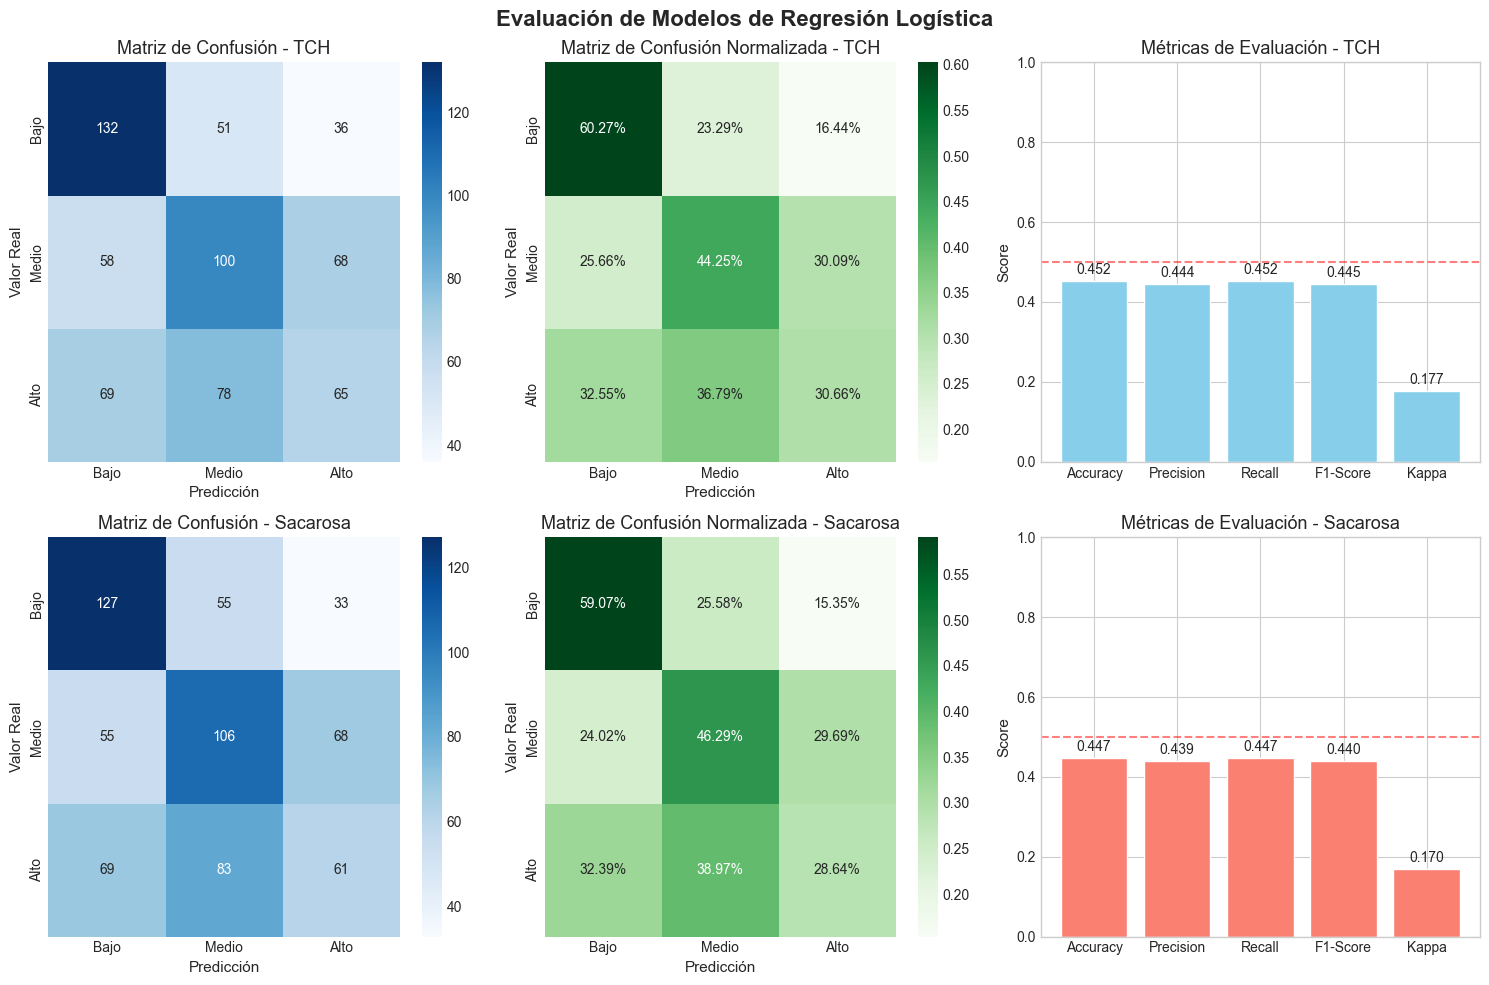

In [42]:
# ============================================
# 6. VISUALIZACI√ìN DE RESULTADOS
# ============================================

print("\n" + "="*60)
print("6. VISUALIZACI√ìN DE RESULTADOS")
print("="*60)

# Crear visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# --- TCH ---
# Matriz de confusi√≥n TCH
sns.heatmap(cm_tch, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
axes[0,0].set_title('Matriz de Confusi√≥n - TCH')
axes[0,0].set_ylabel('Valor Real')
axes[0,0].set_xlabel('Predicci√≥n')

# Matriz de confusi√≥n normalizada TCH
cm_tch_norm = cm_tch.astype('float') / cm_tch.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_tch_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[0,1],
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
axes[0,1].set_title('Matriz de Confusi√≥n Normalizada - TCH')
axes[0,1].set_ylabel('Valor Real')
axes[0,1].set_xlabel('Predicci√≥n')

# Comparaci√≥n de m√©tricas TCH
metricas_nombres = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Kappa']
metricas_valores_tch = [metricas_tch_opt['accuracy'], metricas_tch_opt['precision'],
                        metricas_tch_opt['recall'], metricas_tch_opt['f1'], 
                        metricas_tch_opt['kappa']]
bars_tch = axes[0,2].bar(metricas_nombres, metricas_valores_tch, color='skyblue')
axes[0,2].set_title('M√©tricas de Evaluaci√≥n - TCH')
axes[0,2].set_ylim([0, 1])
axes[0,2].axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
axes[0,2].set_ylabel('Score')

# Agregar valores en las barras
for bar, val in zip(bars_tch, metricas_valores_tch):
    axes[0,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{val:.3f}', ha='center', va='bottom')

# --- SACAROSA ---
# Matriz de confusi√≥n Sacarosa
sns.heatmap(cm_sacarosa, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
axes[1,0].set_title('Matriz de Confusi√≥n - Sacarosa')
axes[1,0].set_ylabel('Valor Real')
axes[1,0].set_xlabel('Predicci√≥n')

# Matriz de confusi√≥n normalizada Sacarosa
cm_sacarosa_norm = cm_sacarosa.astype('float') / cm_sacarosa.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_sacarosa_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[1,1],
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
axes[1,1].set_title('Matriz de Confusi√≥n Normalizada - Sacarosa')
axes[1,1].set_ylabel('Valor Real')
axes[1,1].set_xlabel('Predicci√≥n')

# Comparaci√≥n de m√©tricas Sacarosa
metricas_valores_sacarosa = [metricas_sacarosa_opt['accuracy'], metricas_sacarosa_opt['precision'],
                             metricas_sacarosa_opt['recall'], metricas_sacarosa_opt['f1'],
                             metricas_sacarosa_opt['kappa']]
bars_sacarosa = axes[1,2].bar(metricas_nombres, metricas_valores_sacarosa, color='salmon')
axes[1,2].set_title('M√©tricas de Evaluaci√≥n - Sacarosa')
axes[1,2].set_ylim([0, 1])
axes[1,2].axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
axes[1,2].set_ylabel('Score')

# Agregar valores en las barras
for bar, val in zip(bars_sacarosa, metricas_valores_sacarosa):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{val:.3f}', ha='center', va='bottom')

plt.suptitle('Evaluaci√≥n de Modelos de Regresi√≥n Log√≠stica', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [43]:
# ============================================
# 7. AN√ÅLISIS DE IMPORTANCIA DE VARIABLES
# ============================================

print("\n" + "="*60)
print("7. AN√ÅLISIS DE IMPORTANCIA DE VARIABLES")
print("="*60)

# Obtener coeficientes para cada clase
def analizar_coeficientes(modelo, feature_names, nombre_target):
    """Analiza los coeficientes del modelo"""
    
    print(f"\nüìä Importancia de Variables - {nombre_target}")
    print("-" * 50)
    
    coefs = modelo.best_estimator_.coef_
    
    # Para cada clase
    for i, clase in enumerate(['Bajo', 'Medio', 'Alto']):
        print(f"\nüîπ Clase: {clase}")
        
        # Obtener top 5 variables m√°s importantes (positivas y negativas)
        coef_clase = coefs[i]
        indices_sorted = np.argsort(np.abs(coef_clase))[::-1][:5]
        
        for idx in indices_sorted:
            coef_val = coef_clase[idx]
            direccion = "‚Üë" if coef_val > 0 else "‚Üì"
            print(f"   {feature_names[idx]:15} {direccion} {coef_val:+.4f}")

# Analizar coeficientes
analizar_coeficientes(grid_search_tch, X_columns, "TCH")
analizar_coeficientes(grid_search_sacarosa, X_columns, "Sacarosa")



7. AN√ÅLISIS DE IMPORTANCIA DE VARIABLES

üìä Importancia de Variables - TCH
--------------------------------------------------

üîπ Clase: Bajo
   cortes          ‚Üì -0.2865
   edad            ‚Üë +0.1552
   semsmad         ‚Üì -0.0640
   me              ‚Üë +0.0506
   dosismad        ‚Üë +0.0313

üîπ Clase: Medio
   cortes          ‚Üë +0.1575
   semsmad         ‚Üë +0.1527
   edad            ‚Üì -0.0919
   pct_diatrea     ‚Üì -0.0915
   vejez           ‚Üë +0.0905

üîπ Clase: Alto
   cortes          ‚Üë +0.1291
   semsmad         ‚Üì -0.0888
   me              ‚Üì -0.0774
   pct_diatrea     ‚Üë +0.0746
   vejez           ‚Üì -0.0688

üìä Importancia de Variables - Sacarosa
--------------------------------------------------

üîπ Clase: Bajo
   cortes          ‚Üì -0.4924
   edad            ‚Üë +0.2454
   me              ‚Üë +0.0294
   pct_diatrea     ‚Üì +0.0000
   vejez           ‚Üì +0.0000

üîπ Clase: Medio
   semsmad         ‚Üë +0.2708
   vejez           ‚Üë +0.1178
   

In [44]:
# ============================================
# 8. VALIDACI√ìN CRUZADA FINAL
# ============================================

print("\n" + "="*60)
print("8. VALIDACI√ìN CRUZADA FINAL")
print("="*60)

# Funci√≥n para validaci√≥n cruzada con m√∫ltiples m√©tricas
def validacion_cruzada_completa(modelo, X, y, nombre):
    """Realiza validaci√≥n cruzada con m√∫ltiples m√©tricas"""
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Definir m√©tricas
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'kappa': make_scorer(cohen_kappa_score)
    }
    
    print(f"\nüìä Validaci√≥n Cruzada 5-Fold - {nombre}")
    print("-" * 50)
    
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(modelo, X, y, cv=cv, scoring=scorer)
        print(f"   {metric_name:10}: {scores.mean():.4f} (¬±{scores.std():.4f})")
    
    return scores

# Validaci√≥n cruzada para modelos optimizados
val_tch = validacion_cruzada_completa(grid_search_tch.best_estimator_, 
                                      X_train_scaled, y_tch_train, "TCH")
val_sacarosa = validacion_cruzada_completa(grid_search_sacarosa.best_estimator_,
                                           X_train_scaled, y_sacarosa_train, "Sacarosa")


8. VALIDACI√ìN CRUZADA FINAL

üìä Validaci√≥n Cruzada 5-Fold - TCH
--------------------------------------------------
   accuracy  : 0.4477 (¬±0.0309)
   precision : 0.4462 (¬±0.0364)
   recall    : 0.4477 (¬±0.0309)
   f1        : 0.4403 (¬±0.0329)
   kappa     : 0.1694 (¬±0.0471)

üìä Validaci√≥n Cruzada 5-Fold - Sacarosa
--------------------------------------------------
   accuracy  : 0.4503 (¬±0.0358)
   precision : 0.4483 (¬±0.0369)
   recall    : 0.4503 (¬±0.0358)
   f1        : 0.4452 (¬±0.0370)
   kappa     : 0.1741 (¬±0.0544)


In [45]:
# ============================================
# 9. RESUMEN COMPARATIVO FINAL
# ============================================

print("\n" + "="*60)
print("9. RESUMEN COMPARATIVO FINAL")
print("="*60)

# Crear tabla comparativa
resumen_comparativo = pd.DataFrame({
    'Modelo': ['TCH Base', 'TCH Optimizado', 'Sacarosa Base', 'Sacarosa Optimizado'],
    'Accuracy': [metricas_tch_base['accuracy_test'], metricas_tch_opt['accuracy'],
                metricas_sacarosa_base['accuracy_test'], metricas_sacarosa_opt['accuracy']],
    'Precision': [metricas_tch_base['precision_test'], metricas_tch_opt['precision'],
                 metricas_sacarosa_base['precision_test'], metricas_sacarosa_opt['precision']],
    'Recall': [metricas_tch_base['recall_test'], metricas_tch_opt['recall'],
              metricas_sacarosa_base['recall_test'], metricas_sacarosa_opt['recall']],
    'F1-Score': [metricas_tch_base['f1_test'], metricas_tch_opt['f1'],
                metricas_sacarosa_base['f1_test'], metricas_sacarosa_opt['f1']],
    'Kappa': [metricas_tch_base['kappa_test'], metricas_tch_opt['kappa'],
             metricas_sacarosa_base['kappa_test'], metricas_sacarosa_opt['kappa']]
})

print("\nüìä TABLA COMPARATIVA DE MODELOS:")
print(resumen_comparativo.to_string(index=False))

# Mejora porcentual
mejora_tch = ((metricas_tch_opt['f1'] - metricas_tch_base['f1_test']) / metricas_tch_base['f1_test']) * 100
mejora_sacarosa = ((metricas_sacarosa_opt['f1'] - metricas_sacarosa_base['f1_test']) / metricas_sacarosa_base['f1_test']) * 100

print(f"\nüìà MEJORA CON OPTIMIZACI√ìN:")
print(f"   TCH: {mejora_tch:+.2f}% en F1-Score")
print(f"   Sacarosa: {mejora_sacarosa:+.2f}% en F1-Score")

print("\n" + "="*60)
print("MODELO DE REGRESI√ìN LOG√çSTICA COMPLETADO")
print("="*60)


9. RESUMEN COMPARATIVO FINAL

üìä TABLA COMPARATIVA DE MODELOS:
             Modelo  Accuracy  Precision   Recall  F1-Score    Kappa
           TCH Base  0.455099   0.447869 0.455099  0.448361 0.181155
     TCH Optimizado  0.452055   0.444204 0.452055  0.445404 0.176881
      Sacarosa Base  0.453577   0.446796 0.453577  0.447596 0.179030
Sacarosa Optimizado  0.447489   0.439075 0.447489  0.440066 0.169894

üìà MEJORA CON OPTIMIZACI√ìN:
   TCH: -0.66% en F1-Score
   Sacarosa: -1.68% en F1-Score

MODELO DE REGRESI√ìN LOG√çSTICA COMPLETADO
